In [1]:
import pandas as pd
from sklearn import tree
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Загрузка исходных данных

In [2]:
df_train = pd.read_csv("data/TRAIN.csv")
df_train.head()

,Флаг,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Гребней штормовых волн и приливных течений,0.7,1.8,0.107692,0.276923,-122.473652,-77.993821,135.520169,7,-118.602170,...,0.433492,0.179133,0.299485,0.153846,-4.664417,-2.367140e-04,0.062500,-7.433333,7.100000,0.362848
1,Средняя часть дельты,14.9,50.3,0.180825,0.610437,-91.405245,-90.081713,178.676469,3,-90.384177,...,0.492064,0.078481,0.465969,0.012136,-53.448918,-3.115489e-07,0.014581,0.141667,-0.191667,0.477164
2,Русловых отмелей равнинных меандрирующих рек,0.6,0.3,0.400000,0.200000,-133.866961,-17.836041,63.969080,4,-137.497087,...,0.585334,0.257680,0.611736,0.666667,0.722301,-9.595371e-03,0.357143,-11.025000,8.075000,0.700002
3,Открытого моря и крупных морских заливов,0.8,1.5,0.061069,0.114504,-90.687795,-81.597431,170.909636,6,-92.541710,...,0.593432,0.141762,0.081115,0.076336,6.834284,8.568777e-05,0.069231,-0.575000,0.575000,0.055741
4,Средняя часть дельты,3.5,34.1,0.063636,0.620000,-90.381698,-90.106393,179.724694,4,-90.737181,...,0.488660,0.109891,0.485812,0.018182,-27.770333,-3.119641e-07,0.023679,0.361538,-0.484615,0.511852


In [3]:
df_eval = pd.read_csv("data/EVAL.csv")
df_eval.head()

,Флаг,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Околоканальный вал,2.1,0.4,0.840000,0.160000,-97.275452,-51.304025,134.028573,2,-97.275452,...,0.546720,0.080997,0.436032,0.400000,4.790046,-3.266539e-04,0.125000,-2.750000,2.550000,0.468350
1,Пойменных озер и болот,2.0,0.8,0.089686,0.035874,-69.876578,-128.054761,238.178183,6,-93.807455,...,0.559328,0.156441,0.308291,0.044843,15.248434,2.169153e-05,0.022523,-0.020000,1.640000,0.356681
2,Барьерных островов,5.3,5.7,0.107505,0.115619,-90.383914,-90.004916,179.621002,6,-92.242249,...,0.482741,0.255751,0.631725,0.020284,-7.766201,-1.295929e-05,0.008130,-0.475000,0.650000,0.750053
3,Оползни,1.1,0.7,0.035370,0.022508,-61.476699,-125.467788,243.991089,11,-94.629398,...,0.540283,0.133573,0.135048,0.032154,10.964321,-4.954670e-08,0.029032,0.644444,0.055556,0.117593
4,Устьевых баров,3.2,2.2,0.206452,0.141935,-91.017219,-88.958373,177.941155,7,-94.167841,...,0.551881,0.321724,0.435642,0.064516,3.363011,-1.428089e-04,0.045455,1.133333,-1.150000,0.681495


In [4]:
df_test = pd.read_csv("data/TEST.csv")
df_test.head()

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,0.2,0.4,0.050000,0.100000,-20.933358,-139.271690,298.338332,3,-95.305044,0.950000,...,0.528740,0.124295,0.237410,0.250000,1.158263,0.000611,0.102564,3.750000,2.400000,0.223622
1,12.4,5.1,0.109735,0.045133,-90.095649,-90.001749,179.906100,7,-90.716524,0.334513,...,0.511869,0.132650,0.348793,0.008850,24.687921,-0.000001,0.007086,0.100000,-0.162500,0.381923
2,1.6,1.2,0.145455,0.109091,-92.233456,-87.903403,175.669947,5,-97.283998,0.636364,...,0.508824,0.357266,0.567683,0.090909,0.210983,-0.000366,0.073394,1.500000,-1.871429,0.876448
3,0.4,1.0,0.049383,0.123457,-102.438583,-77.654154,155.215571,5,-94.712733,0.691358,...,0.516073,0.155429,0.094247,0.123457,0.461740,0.000259,0.087500,-0.533333,1.000000,0.059660
4,0.3,0.8,0.096774,0.258065,-100.280725,-39.685935,119.405210,4,-130.099267,0.290323,...,0.518033,0.359997,0.767152,0.322581,0.040506,-0.004585,0.066667,0.000000,-2.700000,1.000000


In [5]:
df_train.keys()

Index(['Флаг', 'МощностьКровЛиния', 'МощностьПодшЛиния', 'ДоляКровЛинии',
       'ДоляПодшЛинии', 'УголКровЛиния', 'УголПодшЛиния', 'УголКровПод',
       'ОбщееКолЛиний', 'свТрендвВерх', 'дУмЗ', 'свТрендвВниз', 'дУвЗ', 'БЛ',
       'дБЛ', 'мощностьБЛ', 'Угол_БЛ', 'УголБокКровл', 'УголБокПодш',
       'ОтношУголКровБок', 'ОтношУголПодшБок', 'МощКровИПодБок', 'G', 'S',
       'Am', 'P', 'Kp', 'm', 'R', 'Kc', 'Kt', 'quantile'],
      dtype='object')

In [6]:
df_train["Флаг"]

0               Гребней штормовых волн и приливных течений
1                                     Средняя часть дельты
2             Русловых отмелей равнинных меандрирующих рек
3                 Открытого моря и крупных морских заливов
4                                     Средняя часть дельты
                               ...                        
26394                                 Дистальные турбидиты
26395                                 Дистальные турбидиты
26396    Вдольбереговых баров (регрессивных) и прибрежн...
26397                    Временно заливаемых участков пойм
26398           Гребней штормовых волн и приливных течений
Name: Флаг, Length: 26399, dtype: object

In [7]:
typegis = {
    '0' : 'Головных частей разрывных течений',
    '1' : 'Барьерных островов',
    '2' : 'Устьевых баров',
    '3' : 'Вдольбереговых баров (регрессивных) и прибрежных валов',
    '4' : 'Забаровых лагун и вдольбереговых промоин',
    '5' : 'Открытого моря и крупных морских заливов',
    '6' : 'Промоин разрывных течений',
    '7' : 'Пляжей',
    '8' : 'Вдольбереговых баров (трансгрессивных) и прибрежных валов',
    '9' : 'Гребней штормовых волн и приливных течений',
    '10' : 'Русловых отмелей спрямленных рек',
    '11' : 'Русловых отмелей фуркирующих рек (горного типа) и временных потоков',
    '12' : 'Русловых отмелей равнинных меандрирующих рек',
    '13' : 'Пески разливов',
    '14' : 'Пойменных озер и болот',
    '15' : 'Береговых валов',
    '16' : 'Временно заливаемых участков пойм',
    '17' : 'Приморских болот (маршей, лайд и др.)',
    '18' : 'Каньоны и каналы стока (питающие)',
    '19' : 'Проксимальные турбидиты и зерновые потоки',
    '20' : 'Средние (переходные) турбидиты',
    '21' : 'Дистальные турбидиты',
    '22' : 'Дно бассейна',
    '23' : 'Фации склона',
    '24' : 'Околоканальный вал',
    '25' : 'Верхний веер склона',
    '26' : 'Оползни',
    '27' : 'Дельтовый канал',
    '28' : 'Проксимальная часть дельты',
    '29' : 'Средняя часть дельты',
    '30' : 'Дистальная часть дельты',
    '31' : 'Продельта',
    '32' : 'Дюн',
    '33' : 'Empty'
}

In [8]:
typegis_inverted = {v: k for k, v in typegis.items()}
typegis_inverted

{'Головных частей разрывных течений': '0',
 'Барьерных островов': '1',
 'Устьевых баров': '2',
 'Вдольбереговых баров (регрессивных) и прибрежных валов': '3',
 'Забаровых лагун и вдольбереговых промоин': '4',
 'Открытого моря и крупных морских заливов': '5',
 'Промоин разрывных течений': '6',
 'Пляжей': '7',
 'Вдольбереговых баров (трансгрессивных) и прибрежных валов': '8',
 'Гребней штормовых волн и приливных течений': '9',
 'Русловых отмелей спрямленных рек': '10',
 'Русловых отмелей фуркирующих рек (горного типа) и временных потоков': '11',
 'Русловых отмелей равнинных меандрирующих рек': '12',
 'Пески разливов': '13',
 'Пойменных озер и болот': '14',
 'Береговых валов': '15',
 'Временно заливаемых участков пойм': '16',
 'Приморских болот (маршей, лайд и др.)': '17',
 'Каньоны и каналы стока (питающие)': '18',
 'Проксимальные турбидиты и зерновые потоки': '19',
 'Средние (переходные) турбидиты': '20',
 'Дистальные турбидиты': '21',
 'Дно бассейна': '22',
 'Фации склона': '23',
 'Око

# Перевод таргетов из строк в числа

In [9]:
# Перевод таргетов из строк в числа
df_train.insert(loc=1 , column='Флаг int', value=df_train["Флаг"].apply(lambda x: typegis_inverted[x]))
df_train

,Флаг,Флаг int,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Гребней штормовых волн и приливных течений,9,0.7,1.8,0.107692,0.276923,-122.473652,-77.993821,135.520169,7,...,0.433492,0.179133,0.299485,0.153846,-4.664417,-2.367140e-04,0.062500,-7.433333,7.100000,0.362848
1,Средняя часть дельты,29,14.9,50.3,0.180825,0.610437,-91.405245,-90.081713,178.676469,3,...,0.492064,0.078481,0.465969,0.012136,-53.448918,-3.115489e-07,0.014581,0.141667,-0.191667,0.477164
2,Русловых отмелей равнинных меандрирующих рек,12,0.6,0.3,0.400000,0.200000,-133.866961,-17.836041,63.969080,4,...,0.585334,0.257680,0.611736,0.666667,0.722301,-9.595371e-03,0.357143,-11.025000,8.075000,0.700002
3,Открытого моря и крупных морских заливов,5,0.8,1.5,0.061069,0.114504,-90.687795,-81.597431,170.909636,6,...,0.593432,0.141762,0.081115,0.076336,6.834284,8.568777e-05,0.069231,-0.575000,0.575000,0.055741
4,Средняя часть дельты,29,3.5,34.1,0.063636,0.620000,-90.381698,-90.106393,179.724694,4,...,0.488660,0.109891,0.485812,0.018182,-27.770333,-3.119641e-07,0.023679,0.361538,-0.484615,0.511852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26394,Дистальные турбидиты,21,10.0,11.8,0.196078,0.231373,-92.433606,-88.602799,176.169193,4,...,0.447603,0.128919,0.299246,0.019608,-46.095929,-4.875038e-06,0.021611,0.245455,-0.354545,0.344882
26395,Дистальные турбидиты,21,0.9,2.0,0.126761,0.281690,-93.088078,-80.353691,167.265613,5,...,0.463351,0.166932,0.322167,0.140845,-3.483866,-3.305007e-04,0.100000,2.371429,NaN,0.385037
26396,Вдольбереговых баров (регрессивных) и прибрежн...,3,8.5,9.9,0.155109,0.180657,-90.505462,-89.887577,179.382116,9,...,0.441941,0.318501,0.409553,0.018248,-13.938588,-1.046808e-05,0.018282,0.133333,-0.111111,0.560035
26397,Временно заливаемых участков пойм,16,0.6,5.1,0.100000,0.850000,-84.002906,-93.118931,189.116025,3,...,0.540543,0.103488,0.388073,0.166667,7.215430,1.602716e-04,0.084746,-4.840000,4.020000,0.469014


# Анализ тренировочной выборки

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26399 entries, 0 to 26398
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               26399 non-null  object 
 1   Флаг int           26399 non-null  object 
 2   МощностьКровЛиния  26399 non-null  float64
 3   МощностьПодшЛиния  26399 non-null  float64
 4   ДоляКровЛинии      26399 non-null  float64
 5   ДоляПодшЛинии      26399 non-null  float64
 6   УголКровЛиния      26399 non-null  float64
 7   УголПодшЛиния      26399 non-null  float64
 8   УголКровПод        26399 non-null  float64
 9   ОбщееКолЛиний      26399 non-null  int64  
 10  свТрендвВерх       25099 non-null  float64
 11  дУмЗ               25099 non-null  float64
 12  свТрендвВниз       26261 non-null  float64
 13  дУвЗ               26261 non-null  float64
 14  БЛ                 8662 non-null   float64
 15  дБЛ                8662 non-null   float64
 16  мощностьБЛ         866

In [11]:
df_train.describe()

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
count,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,25099.000000,25099.000000,...,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26231.000000,24455.000000,26399.000000
mean,4.322849,4.616050,0.250242,0.278645,-84.737818,-84.241462,179.967299,5.505209,-105.297372,0.514843,...,0.504745,0.187892,0.401734,0.220784,-6.637015,-0.000561,0.099423,0.655872,-1.119073,0.484857
std,19.044959,17.358654,0.249772,0.271405,37.061155,35.852660,49.746847,3.338182,16.565586,0.235089,...,0.060055,0.086954,0.182281,0.228105,74.835297,0.003142,0.081836,4.534860,5.208381,0.229826
min,0.100000,0.100000,0.002538,0.001496,-173.904836,-173.644212,15.778254,1.000000,-173.904836,0.002762,...,0.293396,0.018986,0.052842,0.000344,-4952.436645,-0.040807,0.000000,-33.900000,-40.900000,0.042514
25%,0.400000,0.500000,0.086957,0.087719,-95.710593,-91.730067,159.994909,3.000000,-110.547627,0.324324,...,0.470488,0.109020,0.263797,0.056818,-4.133584,-0.000575,0.034324,-0.618333,-2.800000,0.323171
50%,1.100000,1.200000,0.160000,0.161765,-90.378359,-88.305080,177.436348,5.000000,-99.487482,0.519231,...,0.506452,0.184472,0.393436,0.140845,-0.166865,-0.000045,0.078125,0.500000,-0.580000,0.477910
75%,3.000000,3.300000,0.307692,0.360000,-82.986119,-78.809697,192.437014,7.000000,-93.702670,0.703704,...,0.542695,0.262334,0.527077,0.303030,2.259218,0.000011,0.142857,2.352273,0.700000,0.672351
max,977.600000,715.500000,1.000000,1.000000,90.000000,90.000000,342.331070,26.000000,-90.000000,1.000000,...,0.802008,0.420230,0.915500,1.111111,857.913631,0.036364,0.500000,34.500000,39.900000,1.000000


array([[<Axes: title={'center': 'МощностьКровЛиния'}>,
        <Axes: title={'center': 'МощностьПодшЛиния'}>,
        <Axes: title={'center': 'ДоляКровЛинии'}>,
        <Axes: title={'center': 'ДоляПодшЛинии'}>,
        <Axes: title={'center': 'УголКровЛиния'}>,
        <Axes: title={'center': 'УголПодшЛиния'}>],
       [<Axes: title={'center': 'УголКровПод'}>,
        <Axes: title={'center': 'ОбщееКолЛиний'}>,
        <Axes: title={'center': 'свТрендвВерх'}>,
        <Axes: title={'center': 'дУмЗ'}>,
        <Axes: title={'center': 'свТрендвВниз'}>,
        <Axes: title={'center': 'дУвЗ'}>],
       [<Axes: title={'center': 'БЛ'}>, <Axes: title={'center': 'дБЛ'}>,
        <Axes: title={'center': 'мощностьБЛ'}>,
        <Axes: title={'center': 'Угол_БЛ'}>,
        <Axes: title={'center': 'УголБокКровл'}>,
        <Axes: title={'center': 'УголБокПодш'}>],
       [<Axes: title={'center': 'ОтношУголКровБок'}>,
        <Axes: title={'center': 'ОтношУголПодшБок'}>,
        <Axes: title={'cen

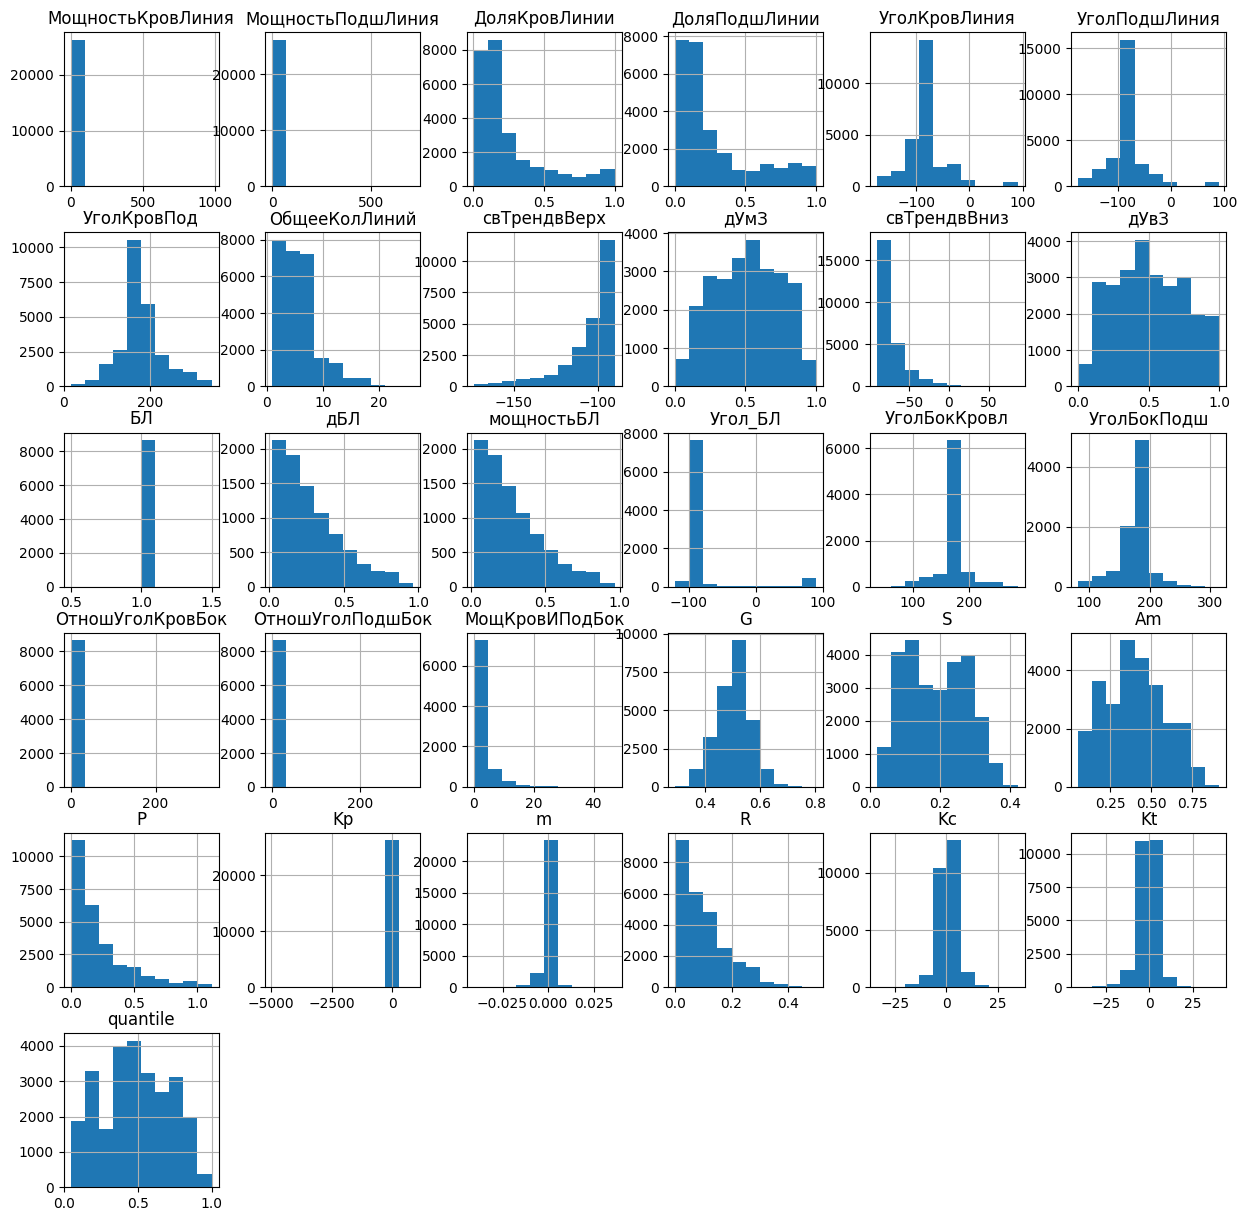

In [12]:
df_train.hist(figsize=(15, 15))

# Подготовка train_x, train_y из выборки TRAIN

In [13]:
df_train.describe()

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
count,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,25099.000000,25099.000000,...,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26399.000000,26231.000000,24455.000000,26399.000000
mean,4.322849,4.616050,0.250242,0.278645,-84.737818,-84.241462,179.967299,5.505209,-105.297372,0.514843,...,0.504745,0.187892,0.401734,0.220784,-6.637015,-0.000561,0.099423,0.655872,-1.119073,0.484857
std,19.044959,17.358654,0.249772,0.271405,37.061155,35.852660,49.746847,3.338182,16.565586,0.235089,...,0.060055,0.086954,0.182281,0.228105,74.835297,0.003142,0.081836,4.534860,5.208381,0.229826
min,0.100000,0.100000,0.002538,0.001496,-173.904836,-173.644212,15.778254,1.000000,-173.904836,0.002762,...,0.293396,0.018986,0.052842,0.000344,-4952.436645,-0.040807,0.000000,-33.900000,-40.900000,0.042514
25%,0.400000,0.500000,0.086957,0.087719,-95.710593,-91.730067,159.994909,3.000000,-110.547627,0.324324,...,0.470488,0.109020,0.263797,0.056818,-4.133584,-0.000575,0.034324,-0.618333,-2.800000,0.323171
50%,1.100000,1.200000,0.160000,0.161765,-90.378359,-88.305080,177.436348,5.000000,-99.487482,0.519231,...,0.506452,0.184472,0.393436,0.140845,-0.166865,-0.000045,0.078125,0.500000,-0.580000,0.477910
75%,3.000000,3.300000,0.307692,0.360000,-82.986119,-78.809697,192.437014,7.000000,-93.702670,0.703704,...,0.542695,0.262334,0.527077,0.303030,2.259218,0.000011,0.142857,2.352273,0.700000,0.672351
max,977.600000,715.500000,1.000000,1.000000,90.000000,90.000000,342.331070,26.000000,-90.000000,1.000000,...,0.802008,0.420230,0.915500,1.111111,857.913631,0.036364,0.500000,34.500000,39.900000,1.000000


In [14]:
# Линейно интерполируем пропуски
df_train_filled = df_train.interpolate(method='linear', axis=0)
df_train_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26399 entries, 0 to 26398
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               26399 non-null  object 
 1   Флаг int           26399 non-null  object 
 2   МощностьКровЛиния  26399 non-null  float64
 3   МощностьПодшЛиния  26399 non-null  float64
 4   ДоляКровЛинии      26399 non-null  float64
 5   ДоляПодшЛинии      26399 non-null  float64
 6   УголКровЛиния      26399 non-null  float64
 7   УголПодшЛиния      26399 non-null  float64
 8   УголКровПод        26399 non-null  float64
 9   ОбщееКолЛиний      26399 non-null  int64  
 10  свТрендвВерх       26399 non-null  float64
 11  дУмЗ               26399 non-null  float64
 12  свТрендвВниз       26399 non-null  float64
 13  дУвЗ               26399 non-null  float64
 14  БЛ                 26388 non-null  float64
 15  дБЛ                26388 non-null  float64
 16  мощностьБЛ         263

In [15]:
df_train_filled.dropna(inplace=True)
df_train_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26388 entries, 11 to 26398
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               26388 non-null  object 
 1   Флаг int           26388 non-null  object 
 2   МощностьКровЛиния  26388 non-null  float64
 3   МощностьПодшЛиния  26388 non-null  float64
 4   ДоляКровЛинии      26388 non-null  float64
 5   ДоляПодшЛинии      26388 non-null  float64
 6   УголКровЛиния      26388 non-null  float64
 7   УголПодшЛиния      26388 non-null  float64
 8   УголКровПод        26388 non-null  float64
 9   ОбщееКолЛиний      26388 non-null  int64  
 10  свТрендвВерх       26388 non-null  float64
 11  дУмЗ               26388 non-null  float64
 12  свТрендвВниз       26388 non-null  float64
 13  дУвЗ               26388 non-null  float64
 14  БЛ                 26388 non-null  float64
 15  дБЛ                26388 non-null  float64
 16  мощностьБЛ         26

In [16]:
y_train_filled = df_train_filled["Флаг int"]
y_train_filled

11       18
12        7
13       20
14        1
15       29
         ..
26394    21
26395    21
26396     3
26397    16
26398     9
Name: Флаг int, Length: 26388, dtype: object

In [17]:
# Список фич - картотажные кривые
features = ["S", "Am", "P", "Kp", "m", "R", "Kc", "Kt"]

In [18]:
features = df_train_filled.keys()
features = list(features)
features.remove("Флаг")
features.remove("Флаг int")
features

['МощностьКровЛиния',
 'МощностьПодшЛиния',
 'ДоляКровЛинии',
 'ДоляПодшЛинии',
 'УголКровЛиния',
 'УголПодшЛиния',
 'УголКровПод',
 'ОбщееКолЛиний',
 'свТрендвВерх',
 'дУмЗ',
 'свТрендвВниз',
 'дУвЗ',
 'БЛ',
 'дБЛ',
 'мощностьБЛ',
 'Угол_БЛ',
 'УголБокКровл',
 'УголБокПодш',
 'ОтношУголКровБок',
 'ОтношУголПодшБок',
 'МощКровИПодБок',
 'G',
 'S',
 'Am',
 'P',
 'Kp',
 'm',
 'R',
 'Kc',
 'Kt',
 'quantile']

In [19]:
x_train_filled = df_train_filled[features]
x_train_filled

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
11,6.2,5.1,0.085517,0.070345,-90.352870,-89.455732,179.102863,9,-90.703735,0.697931,...,0.504408,0.260062,0.749249,0.013793,2.774811,-0.000005,0.013812,0.380000,-0.540000,0.817778
12,0.4,0.9,0.307692,0.692308,-148.781597,-57.200469,88.418871,2,-148.781597,0.307692,...,0.492428,0.266558,0.374643,0.769231,-0.344813,-0.015124,0.083333,-4.200000,-22.300000,0.645000
13,4.1,0.7,0.854167,0.145833,-93.761650,-67.256084,153.494434,2,-93.761650,0.854167,...,0.530494,0.093713,0.435627,0.208333,4.820297,-0.000399,0.106383,-0.750000,-0.075000,0.475943
14,0.4,0.6,0.081633,0.122449,-92.862405,-91.073200,178.210795,6,-96.180197,0.734694,...,0.478061,0.287280,0.707929,0.204082,-1.228369,-0.001335,0.062500,-4.466667,4.933333,0.828857
15,4.8,18.5,0.164948,0.635739,-94.519116,-90.208646,175.689529,3,-91.096640,0.800687,...,0.495440,0.077861,0.461652,0.034364,-13.972464,-0.000002,0.041379,0.275000,-0.441667,0.474697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26394,10.0,11.8,0.196078,0.231373,-92.433606,-88.602799,176.169193,4,-90.861411,0.631373,...,0.447603,0.128919,0.299246,0.019608,-46.095929,-0.000005,0.021611,0.245455,-0.354545,0.344882
26395,0.9,2.0,0.126761,0.281690,-93.088078,-80.353691,167.265613,5,-97.200932,0.619718,...,0.463351,0.166932,0.322167,0.140845,-3.483866,-0.000331,0.100000,2.371429,-0.232828,0.385037
26396,8.5,9.9,0.155109,0.180657,-90.505462,-89.887577,179.382116,9,-93.904310,0.253650,...,0.441941,0.318501,0.409553,0.018248,-13.938588,-0.000010,0.018282,0.133333,-0.111111,0.560035
26397,0.6,5.1,0.100000,0.850000,-84.002906,-93.118931,189.116025,3,-93.118931,0.850000,...,0.540543,0.103488,0.388073,0.166667,7.215430,0.000160,0.084746,-4.840000,4.020000,0.469014


In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=15)

In [22]:
clf.fit(x_train_filled, y_train_filled)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

# Подготовка x_test, y_test из выборки EVAL

In [23]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               5661 non-null   object 
 1   МощностьКровЛиния  5661 non-null   float64
 2   МощностьПодшЛиния  5661 non-null   float64
 3   ДоляКровЛинии      5661 non-null   float64
 4   ДоляПодшЛинии      5661 non-null   float64
 5   УголКровЛиния      5661 non-null   float64
 6   УголПодшЛиния      5661 non-null   float64
 7   УголКровПод        5661 non-null   float64
 8   ОбщееКолЛиний      5661 non-null   int64  
 9   свТрендвВерх       5372 non-null   float64
 10  дУмЗ               5372 non-null   float64
 11  свТрендвВниз       5631 non-null   float64
 12  дУвЗ               5631 non-null   float64
 13  БЛ                 1835 non-null   float64
 14  дБЛ                1835 non-null   float64
 15  мощностьБЛ         1835 non-null   float64
 16  Угол_БЛ            1835 

In [24]:
# Перевод таргетов из строк в числа
df_eval.insert(loc=1 , column='Флаг int', value=df_eval["Флаг"].apply(lambda x: typegis_inverted[x]))
df_eval

,Флаг,Флаг int,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Околоканальный вал,24,2.1,0.4,0.840000,0.160000,-97.275452,-51.304025,134.028573,2,...,0.546720,0.080997,0.436032,0.400000,4.790046,-3.266539e-04,0.125000,-2.750000,2.550000,0.468350
1,Пойменных озер и болот,14,2.0,0.8,0.089686,0.035874,-69.876578,-128.054761,238.178183,6,...,0.559328,0.156441,0.308291,0.044843,15.248434,2.169153e-05,0.022523,-0.020000,1.640000,0.356681
2,Барьерных островов,1,5.3,5.7,0.107505,0.115619,-90.383914,-90.004916,179.621002,6,...,0.482741,0.255751,0.631725,0.020284,-7.766201,-1.295929e-05,0.008130,-0.475000,0.650000,0.750053
3,Оползни,26,1.1,0.7,0.035370,0.022508,-61.476699,-125.467788,243.991089,11,...,0.540283,0.133573,0.135048,0.032154,10.964321,-4.954670e-08,0.029032,0.644444,0.055556,0.117593
4,Устьевых баров,2,3.2,2.2,0.206452,0.141935,-91.017219,-88.958373,177.941155,7,...,0.551881,0.321724,0.435642,0.064516,3.363011,-1.428089e-04,0.045455,1.133333,-1.150000,0.681495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,Открытого моря и крупных морских заливов,5,0.4,0.5,0.068966,0.086207,-98.454126,-60.601458,142.147332,6,...,0.472329,0.206974,0.106357,0.172414,-0.804585,6.783404e-04,0.122807,1.666667,1.600000,0.074922
5657,Открытого моря и крупных морских заливов,5,0.3,2.1,0.025862,0.181034,-99.319321,-82.723150,163.403828,6,...,0.692862,0.179572,0.105700,0.086207,10.527146,1.020477e-04,0.060870,1.066667,-0.216667,0.099765
5658,Каньоны и каналы стока (питающие),18,3.0,0.3,0.882353,0.088235,-90.175512,-86.697234,176.521723,3,...,0.460772,0.209587,0.684366,0.294118,-2.770078,-1.340034e-03,0.151515,7.400000,NaN,0.743260
5659,"Приморских болот (маршей, лайд и др.)",17,3.3,0.2,0.942857,0.057143,-84.706591,-136.480967,231.774376,2,...,0.459996,0.071710,0.318512,0.285714,-11.838425,-1.609525e-05,0.176471,2.900000,1.583333,0.353079


In [25]:
# Линейно интерполируем пропуски
df_eval_filled = df_eval.interpolate(method='linear', axis=0)
df_eval_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               5661 non-null   object 
 1   Флаг int           5661 non-null   object 
 2   МощностьКровЛиния  5661 non-null   float64
 3   МощностьПодшЛиния  5661 non-null   float64
 4   ДоляКровЛинии      5661 non-null   float64
 5   ДоляПодшЛинии      5661 non-null   float64
 6   УголКровЛиния      5661 non-null   float64
 7   УголПодшЛиния      5661 non-null   float64
 8   УголКровПод        5661 non-null   float64
 9   ОбщееКолЛиний      5661 non-null   int64  
 10  свТрендвВерх       5661 non-null   float64
 11  дУмЗ               5661 non-null   float64
 12  свТрендвВниз       5661 non-null   float64
 13  дУвЗ               5661 non-null   float64
 14  БЛ                 5659 non-null   float64
 15  дБЛ                5659 non-null   float64
 16  мощностьБЛ         5659 

In [26]:
df_eval_filled.dropna(inplace=True)
df_eval_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 2 to 5660
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Флаг               5659 non-null   object 
 1   Флаг int           5659 non-null   object 
 2   МощностьКровЛиния  5659 non-null   float64
 3   МощностьПодшЛиния  5659 non-null   float64
 4   ДоляКровЛинии      5659 non-null   float64
 5   ДоляПодшЛинии      5659 non-null   float64
 6   УголКровЛиния      5659 non-null   float64
 7   УголПодшЛиния      5659 non-null   float64
 8   УголКровПод        5659 non-null   float64
 9   ОбщееКолЛиний      5659 non-null   int64  
 10  свТрендвВерх       5659 non-null   float64
 11  дУмЗ               5659 non-null   float64
 12  свТрендвВниз       5659 non-null   float64
 13  дУвЗ               5659 non-null   float64
 14  БЛ                 5659 non-null   float64
 15  дБЛ                5659 non-null   float64
 16  мощностьБЛ         5659 

In [27]:
y_eval_filled = df_eval_filled["Флаг int"]
y_eval_filled

2        1
3       26
4        2
5       16
6       18
        ..
5656     5
5657     5
5658    18
5659    17
5660    10
Name: Флаг int, Length: 5659, dtype: object

In [28]:
x_eval_filled = df_eval_filled[features]
x_eval_filled

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
2,5.3,5.7,0.107505,0.115619,-90.383914,-90.004916,179.621002,6,-92.242249,0.338742,...,0.482741,0.255751,0.631725,0.020284,-7.766201,-1.295929e-05,0.008130,-0.475000,0.650000,0.750053
3,1.1,0.7,0.035370,0.022508,-61.476699,-125.467788,243.991089,11,-94.629398,0.450161,...,0.540283,0.133573,0.135048,0.032154,10.964321,-4.954670e-08,0.029032,0.644444,0.055556,0.117593
4,3.2,2.2,0.206452,0.141935,-91.017219,-88.958373,177.941155,7,-94.167841,0.716129,...,0.551881,0.321724,0.435642,0.064516,3.363011,-1.428089e-04,0.045455,1.133333,-1.150000,0.681495
5,0.2,0.6,0.142857,0.428571,-35.131224,-83.027190,227.895966,3,-114.752665,0.428571,...,0.576111,0.108955,0.411478,0.714286,2.258632,1.620044e-03,0.307692,1.075000,-2.350000,0.472283
6,1.3,1.2,0.084967,0.078431,-91.767153,-88.466050,176.698896,6,-92.653978,0.673203,...,0.500583,0.241447,0.650887,0.065359,-0.420535,-1.196088e-04,0.039474,2.116667,-3.550000,0.739241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,0.4,0.5,0.068966,0.086207,-98.454126,-60.601458,142.147332,6,-108.146712,0.206897,...,0.472329,0.206974,0.106357,0.172414,-0.804585,6.783404e-04,0.122807,1.666667,1.600000,0.074922
5657,0.3,2.1,0.025862,0.181034,-99.319321,-82.723150,163.403828,6,-93.678697,0.724138,...,0.692862,0.179572,0.105700,0.086207,10.527146,1.020477e-04,0.060870,1.066667,-0.216667,0.099765
5658,3.0,0.3,0.882353,0.088235,-90.175512,-86.697234,176.521723,3,-90.175512,0.882353,...,0.460772,0.209587,0.684366,0.294118,-2.770078,-1.340034e-03,0.151515,7.400000,0.683333,0.743260
5659,3.3,0.2,0.942857,0.057143,-84.706591,-136.480967,231.774376,2,-136.480967,0.057143,...,0.459996,0.071710,0.318512,0.285714,-11.838425,-1.609525e-05,0.176471,2.900000,1.583333,0.353079


In [29]:
y_eval_predicted = clf.predict(x_eval_filled)
y_eval_predicted

array(['1', '26', '2', ..., '18', '17', '10'], dtype=object)

# Оценка качества модели

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [31]:
accuracy_score(y_eval_filled, y_eval_predicted)

0.8653472344937269

# Объединяем выборки

In [35]:
df_train = df_train_filled.append(df_eval_filled).reset_index(drop=True)
df_train

C:\Users\User\AppData\Local\Temp\ipykernel_1680\101886107.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_filled.append(df_eval_filled).reset_index(drop=True)


,Флаг,Флаг int,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Каньоны и каналы стока (питающие),18,6.2,5.1,0.085517,0.070345,-90.352870,-89.455732,179.102863,9,...,0.504408,0.260062,0.749249,0.013793,2.774811,-0.000005,0.013812,0.380000,-0.540000,0.817778
1,Пляжей,7,0.4,0.9,0.307692,0.692308,-148.781597,-57.200469,88.418871,2,...,0.492428,0.266558,0.374643,0.769231,-0.344813,-0.015124,0.083333,-4.200000,-22.300000,0.645000
2,Средние (переходные) турбидиты,20,4.1,0.7,0.854167,0.145833,-93.761650,-67.256084,153.494434,2,...,0.530494,0.093713,0.435627,0.208333,4.820297,-0.000399,0.106383,-0.750000,-0.075000,0.475943
3,Барьерных островов,1,0.4,0.6,0.081633,0.122449,-92.862405,-91.073200,178.210795,6,...,0.478061,0.287280,0.707929,0.204082,-1.228369,-0.001335,0.062500,-4.466667,4.933333,0.828857
4,Средняя часть дельты,29,4.8,18.5,0.164948,0.635739,-94.519116,-90.208646,175.689529,3,...,0.495440,0.077861,0.461652,0.034364,-13.972464,-0.000002,0.041379,0.275000,-0.441667,0.474697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32042,Открытого моря и крупных морских заливов,5,0.4,0.5,0.068966,0.086207,-98.454126,-60.601458,142.147332,6,...,0.472329,0.206974,0.106357,0.172414,-0.804585,0.000678,0.122807,1.666667,1.600000,0.074922
32043,Открытого моря и крупных морских заливов,5,0.3,2.1,0.025862,0.181034,-99.319321,-82.723150,163.403828,6,...,0.692862,0.179572,0.105700,0.086207,10.527146,0.000102,0.060870,1.066667,-0.216667,0.099765
32044,Каньоны и каналы стока (питающие),18,3.0,0.3,0.882353,0.088235,-90.175512,-86.697234,176.521723,3,...,0.460772,0.209587,0.684366,0.294118,-2.770078,-0.001340,0.151515,7.400000,0.683333,0.743260
32045,"Приморских болот (маршей, лайд и др.)",17,3.3,0.2,0.942857,0.057143,-84.706591,-136.480967,231.774376,2,...,0.459996,0.071710,0.318512,0.285714,-11.838425,-0.000016,0.176471,2.900000,1.583333,0.353079


# Оптимизируем параметр "max depth"

In [36]:
max_depth_values = range(1, 20)

In [37]:
scores_data = pd.DataFrame()

In [38]:
for max_depth in max_depth_values:
    print("current_max_depth:", max_depth)
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=max_depth)
    clf.fit(x_train_filled, y_train_filled)
    train_score = clf.score(x_train_filled, y_train_filled)
    test_score = clf.score(x_eval_filled, y_eval_filled)
    temp_score_data = pd.DataFrame({"max_depth": [max_depth],
                                    "train_score": [train_score],
                                    "test_score": [test_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

current_max_depth: 1


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 2


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 3


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 4


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 5


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 6


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 7


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 8


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 9


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 10


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 11


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 12


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 13


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 14


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 15


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 16


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 17


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 18


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 19


C:\Users\User\AppData\Local\Temp\ipykernel_1680\2389827287.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


In [39]:
scores_data

,max_depth,train_score,test_score
0,1,0.061884,0.054427
0,2,0.122518,0.111681
0,3,0.231431,0.217353
0,4,0.418486,0.405372
0,5,0.621419,0.616540
0,6,0.740943,0.734582
0,7,0.785888,0.767450
0,8,0.838146,0.808800
0,9,0.866720,0.830712
0,10,0.894156,0.847146


In [40]:
scores_data_long = pd.melt(scores_data,
                           id_vars=["max_depth"],
                           value_vars=["train_score", "test_score"],
                           var_name="set_type",
                           value_name="score"
                          )

In [41]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.061884
1,2,train_score,0.122518
2,3,train_score,0.231431
3,4,train_score,0.418486
4,5,train_score,0.621419
5,6,train_score,0.740943
6,7,train_score,0.785888
7,8,train_score,0.838146
8,9,train_score,0.866720
9,10,train_score,0.894156


In [42]:
# Визуализация зависимости точности модели на тренировочной и тестовой выборках от глубины дерева

<Axes: xlabel='max_depth', ylabel='score'>

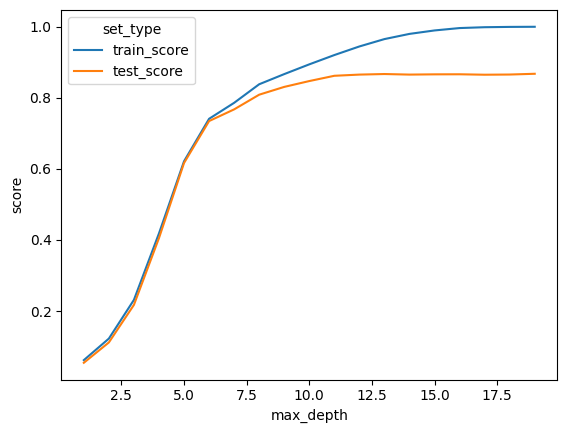

In [43]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

# Прогноз на тестовых данных

In [44]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=14)

In [45]:
clf.fit(x_train_filled, y_train_filled)

DecisionTreeClassifier(criterion='entropy', max_depth=14, random_state=42)

In [46]:
x_test = df_test[features]
x_test

,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,свТрендвВерх,дУмЗ,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,0.2,0.4,0.050000,0.100000,-20.933358,-139.271690,298.338332,3,-95.305044,0.950000,...,0.528740,0.124295,0.237410,0.250000,1.158263,0.000611,0.102564,3.750000,2.400000,0.223622
1,12.4,5.1,0.109735,0.045133,-90.095649,-90.001749,179.906100,7,-90.716524,0.334513,...,0.511869,0.132650,0.348793,0.008850,24.687921,-0.000001,0.007086,0.100000,-0.162500,0.381923
2,1.6,1.2,0.145455,0.109091,-92.233456,-87.903403,175.669947,5,-97.283998,0.636364,...,0.508824,0.357266,0.567683,0.090909,0.210983,-0.000366,0.073394,1.500000,-1.871429,0.876448
3,0.4,1.0,0.049383,0.123457,-102.438583,-77.654154,155.215571,5,-94.712733,0.691358,...,0.516073,0.155429,0.094247,0.123457,0.461740,0.000259,0.087500,-0.533333,1.000000,0.059660
4,0.3,0.8,0.096774,0.258065,-100.280725,-39.685935,119.405210,4,-130.099267,0.290323,...,0.518033,0.359997,0.767152,0.322581,0.040506,-0.004585,0.066667,0.000000,-2.700000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,1.3,2.0,0.078788,0.121212,-89.826633,-83.364375,173.537742,7,-92.215294,0.618182,...,0.566508,0.159503,0.093341,0.060606,5.556185,0.000062,0.060976,-0.344444,0.766667,0.068167
935,3.1,2.9,0.130802,0.122363,-81.423197,-100.989861,199.566664,7,-93.543439,0.725738,...,0.525420,0.207653,0.329998,0.042194,4.475706,0.000040,0.012712,-0.033333,0.966667,0.327588
936,0.9,0.1,0.195652,0.021739,-90.998263,-17.683926,106.685663,7,-107.377265,0.934783,...,0.652566,0.258845,0.259929,0.217391,2.833740,-0.000610,0.133333,13.320000,-11.020000,0.313645
937,3.0,0.6,0.217391,0.043478,-100.682537,-92.971573,172.289036,7,-95.703288,0.681159,...,0.467164,0.224177,0.692770,0.072464,-6.661399,-0.000120,0.043796,3.233333,-4.116667,0.778972


In [47]:
# Линейно интерполируем пропуски
df_test_filled = df_test.interpolate(method='linear', axis=1)
df_test_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   МощностьКровЛиния  939 non-null    float64
 1   МощностьПодшЛиния  939 non-null    float64
 2   ДоляКровЛинии      939 non-null    float64
 3   ДоляПодшЛинии      939 non-null    float64
 4   УголКровЛиния      939 non-null    float64
 5   УголПодшЛиния      939 non-null    float64
 6   УголКровПод        939 non-null    float64
 7   ОбщееКолЛиний      939 non-null    float64
 8   свТрендвВерх       939 non-null    float64
 9   дУмЗ               939 non-null    float64
 10  свТрендвВниз       939 non-null    float64
 11  дУвЗ               939 non-null    float64
 12  БЛ                 939 non-null    float64
 13  дБЛ                939 non-null    float64
 14  мощностьБЛ         939 non-null    float64
 15  Угол_БЛ            939 non-null    float64
 16  УголБокКровл       939 non

In [48]:
x_test_filled = df_test_filled[features]

In [49]:
predicted = clf.predict(x_test_filled)
predicted = pd.DataFrame(columns=["predict"],data=predicted)
predicted = predicted["predict"].astype(int)
predicted

0      23
1      21
2       2
3       5
4       2
       ..
934     5
935    14
936     8
937    19
938     1
Name: predict, Length: 939, dtype: int32

In [50]:
predicted.to_csv("PLOTNIYGAS2_1.csv", index=False)

# Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=14)

In [53]:
df_train

,Флаг,Флаг int,МощностьКровЛиния,МощностьПодшЛиния,ДоляКровЛинии,ДоляПодшЛинии,УголКровЛиния,УголПодшЛиния,УголКровПод,ОбщееКолЛиний,...,G,S,Am,P,Kp,m,R,Kc,Kt,quantile
0,Каньоны и каналы стока (питающие),18,6.2,5.1,0.085517,0.070345,-90.352870,-89.455732,179.102863,9,...,0.504408,0.260062,0.749249,0.013793,2.774811,-0.000005,0.013812,0.380000,-0.540000,0.817778
1,Пляжей,7,0.4,0.9,0.307692,0.692308,-148.781597,-57.200469,88.418871,2,...,0.492428,0.266558,0.374643,0.769231,-0.344813,-0.015124,0.083333,-4.200000,-22.300000,0.645000
2,Средние (переходные) турбидиты,20,4.1,0.7,0.854167,0.145833,-93.761650,-67.256084,153.494434,2,...,0.530494,0.093713,0.435627,0.208333,4.820297,-0.000399,0.106383,-0.750000,-0.075000,0.475943
3,Барьерных островов,1,0.4,0.6,0.081633,0.122449,-92.862405,-91.073200,178.210795,6,...,0.478061,0.287280,0.707929,0.204082,-1.228369,-0.001335,0.062500,-4.466667,4.933333,0.828857
4,Средняя часть дельты,29,4.8,18.5,0.164948,0.635739,-94.519116,-90.208646,175.689529,3,...,0.495440,0.077861,0.461652,0.034364,-13.972464,-0.000002,0.041379,0.275000,-0.441667,0.474697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32042,Открытого моря и крупных морских заливов,5,0.4,0.5,0.068966,0.086207,-98.454126,-60.601458,142.147332,6,...,0.472329,0.206974,0.106357,0.172414,-0.804585,0.000678,0.122807,1.666667,1.600000,0.074922
32043,Открытого моря и крупных морских заливов,5,0.3,2.1,0.025862,0.181034,-99.319321,-82.723150,163.403828,6,...,0.692862,0.179572,0.105700,0.086207,10.527146,0.000102,0.060870,1.066667,-0.216667,0.099765
32044,Каньоны и каналы стока (питающие),18,3.0,0.3,0.882353,0.088235,-90.175512,-86.697234,176.521723,3,...,0.460772,0.209587,0.684366,0.294118,-2.770078,-0.001340,0.151515,7.400000,0.683333,0.743260
32045,"Приморских болот (маршей, лайд и др.)",17,3.3,0.2,0.942857,0.057143,-84.706591,-136.480967,231.774376,2,...,0.459996,0.071710,0.318512,0.285714,-11.838425,-0.000016,0.176471,2.900000,1.583333,0.353079


In [54]:
cross_val_score(clf, x_train_filled, y_train_filled, cv=5).mean()

0.8674397887175523

In [55]:
max_depth_values = range(1, 30)

In [56]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    print("current_max_depth:", max_depth)
    clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=max_depth)
    clf.fit(x_train_filled, y_train_filled)
    train_score = clf.score(x_train_filled, y_train_filled)
    test_score = clf.score(x_eval_filled, y_eval_filled)
    
    mean_cross_val_score = cross_val_score(clf, x_train_filled, y_train_filled, cv=5).mean()
    
    temp_score_data = pd.DataFrame({"max_depth": [max_depth],
                                    "train_score": [train_score],
                                    "test_score": [test_score],
                                    "cross_val_score": [mean_cross_val_score]
                                   })
    scores_data = scores_data.append(temp_score_data)

current_max_depth: 1


C:\Users\User\AppData\Local\Temp\ipykernel_1680\3318257368.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 2


C:\Users\User\AppData\Local\Temp\ipykernel_1680\3318257368.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 3


C:\Users\User\AppData\Local\Temp\ipykernel_1680\3318257368.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


current_max_depth: 4


In [ ]:
scores_data.head()

In [ ]:
scores_data_long = pd.melt(scores_data,
                           id_vars=["max_depth"],
                           value_vars=["train_score", "test_score", "cross_val_score"],
                           var_name="set_type",
                           value_name="score"
                          )

In [ ]:
scores_data_long.head()

In [ ]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

# CatBoost

In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
            'learning_rate': [0.05, 0.1, 0.5],
            'depth': [7, 10, 15],
            'l2_leaf_reg': [3, 5, 9],
            'iterations': [30, ]
             }

In [36]:
cbc = CatBoostClassifier(iterations=None)

In [37]:
grid_search = GridSearchCV(cbc, param_grid=param_grid, cv=5, verbose=True, n_jobs=8)

In [38]:
grid_search.fit(x_train_filled, y_train_filled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
49 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
49 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_m

0:	learn: 1.5142841	total: 2.55s	remaining: 1m 13s
1:	learn: 1.1417358	total: 4.76s	remaining: 1m 6s
2:	learn: 0.9484025	total: 7.05s	remaining: 1m 3s
3:	learn: 0.8266512	total: 9.33s	remaining: 1m
4:	learn: 0.7510524	total: 11.6s	remaining: 58.1s
5:	learn: 0.6796914	total: 14s	remaining: 55.9s
6:	learn: 0.6154038	total: 16.5s	remaining: 54.2s
7:	learn: 0.5547553	total: 19s	remaining: 52.2s
8:	learn: 0.5202927	total: 21.5s	remaining: 50.1s
9:	learn: 0.4738964	total: 24s	remaining: 47.9s
10:	learn: 0.4456615	total: 26.4s	remaining: 45.6s
11:	learn: 0.4175417	total: 28.9s	remaining: 43.4s
12:	learn: 0.3963208	total: 31.4s	remaining: 41s
13:	learn: 0.3805720	total: 33.9s	remaining: 38.7s
14:	learn: 0.3615668	total: 36.3s	remaining: 36.3s
15:	learn: 0.3482619	total: 38.8s	remaining: 33.9s
16:	learn: 0.3307494	total: 41.2s	remaining: 31.5s
17:	learn: 0.3096102	total: 43.7s	remaining: 29.1s
18:	learn: 0.2955374	total: 46.2s	remaining: 26.7s
19:	learn: 0.2844709	total: 48.7s	remaining: 24.3s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D05D893110>,
             n_jobs=8,
             param_grid={'depth': [7, 10, 15], 'iterations': [30],
                         'l2_leaf_reg': [3, 5, 9],
                         'learning_rate': [0.05, 0.1, 0.5]},
             verbose=True)

In [39]:
grid_search.best_params_

{'depth': 10, 'iterations': 30, 'l2_leaf_reg': 5, 'learning_rate': 0.5}

In [ ]:
cbc.fit(x_train_filled, y_train_filled)

In [40]:
y_eval_predicted = grid_search.predict(x_eval_filled)
y_eval_predicted

array([['1'],
       ['26'],
       ['2'],
       ...,
       ['19'],
       ['17'],
       ['10']], dtype=object)

In [41]:
accuracy_score(y_eval_filled, y_eval_predicted)

0.8932673617246863

# Default CatBoost

In [177]:
cbc = CatBoostClassifier(iterations=10000)

In [178]:
cbc.fit(x_train_filled, y_train_filled)

Learning rate set to 0.01336
0:	learn: 3.3702202	total: 242ms	remaining: 40m 19s
1:	learn: 3.2658101	total: 472ms	remaining: 39m 18s
2:	learn: 3.1740469	total: 702ms	remaining: 38m 58s
3:	learn: 3.0842348	total: 958ms	remaining: 39m 52s
4:	learn: 3.0139961	total: 1.2s	remaining: 40m
5:	learn: 2.9445288	total: 1.44s	remaining: 39m 54s
6:	learn: 2.8789031	total: 1.71s	remaining: 40m 47s
7:	learn: 2.8128997	total: 1.97s	remaining: 40m 57s
8:	learn: 2.7575781	total: 2.22s	remaining: 41m 6s
9:	learn: 2.7003742	total: 2.48s	remaining: 41m 12s
10:	learn: 2.6477865	total: 2.73s	remaining: 41m 21s
11:	learn: 2.6028288	total: 2.99s	remaining: 41m 29s
12:	learn: 2.5531352	total: 3.25s	remaining: 41m 39s
13:	learn: 2.5043401	total: 3.5s	remaining: 41m 37s
14:	learn: 2.4676121	total: 3.76s	remaining: 41m 44s
15:	learn: 2.4306895	total: 4.13s	remaining: 42m 58s
16:	learn: 2.3866349	total: 4.7s	remaining: 45m 57s
17:	learn: 2.3511060	total: 5.62s	remaining: 51m 56s
18:	learn: 2.3167334	total: 6.54s	r

147:	learn: 0.8014075	total: 1m 22s	remaining: 1h 31m 22s
148:	learn: 0.7978840	total: 1m 22s	remaining: 1h 31m 22s
149:	learn: 0.7943023	total: 1m 23s	remaining: 1h 31m 17s
150:	learn: 0.7907754	total: 1m 24s	remaining: 1h 31m 19s
151:	learn: 0.7874304	total: 1m 24s	remaining: 1h 31m 15s
152:	learn: 0.7836994	total: 1m 25s	remaining: 1h 31m 14s
153:	learn: 0.7797399	total: 1m 25s	remaining: 1h 31m 13s
154:	learn: 0.7766474	total: 1m 26s	remaining: 1h 31m 9s
155:	learn: 0.7732628	total: 1m 26s	remaining: 1h 31m 10s
156:	learn: 0.7694270	total: 1m 27s	remaining: 1h 31m 6s
157:	learn: 0.7655734	total: 1m 27s	remaining: 1h 31m 6s
158:	learn: 0.7617671	total: 1m 28s	remaining: 1h 31m 11s
159:	learn: 0.7587577	total: 1m 28s	remaining: 1h 31m 11s
160:	learn: 0.7552750	total: 1m 29s	remaining: 1h 31m 13s
161:	learn: 0.7520987	total: 1m 30s	remaining: 1h 31m 8s
162:	learn: 0.7484199	total: 1m 30s	remaining: 1h 31m 9s
163:	learn: 0.7447379	total: 1m 31s	remaining: 1h 31m 9s
164:	learn: 0.741724

290:	learn: 0.4869288	total: 2m 26s	remaining: 1h 21m 43s
291:	learn: 0.4853606	total: 2m 27s	remaining: 1h 21m 38s
292:	learn: 0.4839945	total: 2m 27s	remaining: 1h 21m 34s
293:	learn: 0.4826931	total: 2m 28s	remaining: 1h 21m 30s
294:	learn: 0.4813205	total: 2m 28s	remaining: 1h 21m 26s
295:	learn: 0.4798261	total: 2m 28s	remaining: 1h 21m 23s
296:	learn: 0.4786862	total: 2m 29s	remaining: 1h 21m 19s
297:	learn: 0.4774514	total: 2m 29s	remaining: 1h 21m 14s
298:	learn: 0.4761021	total: 2m 30s	remaining: 1h 21m 11s
299:	learn: 0.4750558	total: 2m 30s	remaining: 1h 21m 6s
300:	learn: 0.4736273	total: 2m 30s	remaining: 1h 21m 2s
301:	learn: 0.4723588	total: 2m 31s	remaining: 1h 20m 58s
302:	learn: 0.4712514	total: 2m 31s	remaining: 1h 20m 54s
303:	learn: 0.4701422	total: 2m 32s	remaining: 1h 20m 51s
304:	learn: 0.4688238	total: 2m 32s	remaining: 1h 20m 47s
305:	learn: 0.4676805	total: 2m 32s	remaining: 1h 20m 44s
306:	learn: 0.4665070	total: 2m 33s	remaining: 1h 20m 40s
307:	learn: 0.46

432:	learn: 0.3589246	total: 3m 31s	remaining: 1h 18m 2s
433:	learn: 0.3582718	total: 3m 32s	remaining: 1h 17m 59s
434:	learn: 0.3578549	total: 3m 32s	remaining: 1h 17m 56s
435:	learn: 0.3573583	total: 3m 33s	remaining: 1h 17m 52s
436:	learn: 0.3569701	total: 3m 33s	remaining: 1h 17m 49s
437:	learn: 0.3564363	total: 3m 33s	remaining: 1h 17m 46s
438:	learn: 0.3556958	total: 3m 34s	remaining: 1h 17m 43s
439:	learn: 0.3552180	total: 3m 34s	remaining: 1h 17m 39s
440:	learn: 0.3545337	total: 3m 34s	remaining: 1h 17m 36s
441:	learn: 0.3538793	total: 3m 35s	remaining: 1h 17m 33s
442:	learn: 0.3532993	total: 3m 35s	remaining: 1h 17m 30s
443:	learn: 0.3526457	total: 3m 35s	remaining: 1h 17m 27s
444:	learn: 0.3519178	total: 3m 36s	remaining: 1h 17m 24s
445:	learn: 0.3514118	total: 3m 36s	remaining: 1h 17m 20s
446:	learn: 0.3507661	total: 3m 37s	remaining: 1h 17m 17s
447:	learn: 0.3500890	total: 3m 37s	remaining: 1h 17m 14s
448:	learn: 0.3496046	total: 3m 37s	remaining: 1h 17m 11s
449:	learn: 0.3

575:	learn: 0.2929588	total: 4m 24s	remaining: 1h 12m 12s
576:	learn: 0.2925110	total: 4m 25s	remaining: 1h 12m 12s
577:	learn: 0.2919667	total: 4m 25s	remaining: 1h 12m 12s
578:	learn: 0.2916610	total: 4m 26s	remaining: 1h 12m 11s
579:	learn: 0.2913819	total: 4m 26s	remaining: 1h 12m 11s
580:	learn: 0.2910845	total: 4m 27s	remaining: 1h 12m 11s
581:	learn: 0.2906363	total: 4m 27s	remaining: 1h 12m 10s
582:	learn: 0.2904114	total: 4m 28s	remaining: 1h 12m 10s
583:	learn: 0.2901606	total: 4m 28s	remaining: 1h 12m 10s
584:	learn: 0.2898521	total: 4m 29s	remaining: 1h 12m 9s
585:	learn: 0.2895770	total: 4m 29s	remaining: 1h 12m 10s
586:	learn: 0.2892946	total: 4m 30s	remaining: 1h 12m 10s
587:	learn: 0.2890004	total: 4m 30s	remaining: 1h 12m 10s
588:	learn: 0.2886685	total: 4m 31s	remaining: 1h 12m 11s
589:	learn: 0.2882402	total: 4m 31s	remaining: 1h 12m 10s
590:	learn: 0.2878974	total: 4m 32s	remaining: 1h 12m 10s
591:	learn: 0.2874399	total: 4m 32s	remaining: 1h 12m 11s
592:	learn: 0.2

718:	learn: 0.2511648	total: 5m 26s	remaining: 1h 10m 18s
719:	learn: 0.2508915	total: 5m 27s	remaining: 1h 10m 16s
720:	learn: 0.2507305	total: 5m 27s	remaining: 1h 10m 14s
721:	learn: 0.2504963	total: 5m 27s	remaining: 1h 10m 13s
722:	learn: 0.2502548	total: 5m 28s	remaining: 1h 10m 11s
723:	learn: 0.2500199	total: 5m 28s	remaining: 1h 10m 8s
724:	learn: 0.2497789	total: 5m 28s	remaining: 1h 10m 6s
725:	learn: 0.2496261	total: 5m 29s	remaining: 1h 10m 4s
726:	learn: 0.2494296	total: 5m 29s	remaining: 1h 10m 2s
727:	learn: 0.2490608	total: 5m 29s	remaining: 1h 10m
728:	learn: 0.2486731	total: 5m 30s	remaining: 1h 9m 58s
729:	learn: 0.2483746	total: 5m 30s	remaining: 1h 9m 56s
730:	learn: 0.2480115	total: 5m 30s	remaining: 1h 9m 54s
731:	learn: 0.2478281	total: 5m 31s	remaining: 1h 9m 52s
732:	learn: 0.2476148	total: 5m 31s	remaining: 1h 9m 50s
733:	learn: 0.2474780	total: 5m 31s	remaining: 1h 9m 48s
734:	learn: 0.2471891	total: 5m 32s	remaining: 1h 9m 46s
735:	learn: 0.2470054	total: 

863:	learn: 0.2222028	total: 6m 21s	remaining: 1h 7m 10s
864:	learn: 0.2220214	total: 6m 21s	remaining: 1h 7m 11s
865:	learn: 0.2218510	total: 6m 22s	remaining: 1h 7m 11s
866:	learn: 0.2216286	total: 6m 22s	remaining: 1h 7m 12s
867:	learn: 0.2215162	total: 6m 23s	remaining: 1h 7m 12s
868:	learn: 0.2214063	total: 6m 23s	remaining: 1h 7m 12s
869:	learn: 0.2212927	total: 6m 24s	remaining: 1h 7m 13s
870:	learn: 0.2211315	total: 6m 24s	remaining: 1h 7m 14s
871:	learn: 0.2209887	total: 6m 25s	remaining: 1h 7m 15s
872:	learn: 0.2207840	total: 6m 26s	remaining: 1h 7m 16s
873:	learn: 0.2206532	total: 6m 26s	remaining: 1h 7m 17s
874:	learn: 0.2205588	total: 6m 27s	remaining: 1h 7m 18s
875:	learn: 0.2203874	total: 6m 27s	remaining: 1h 7m 20s
876:	learn: 0.2201811	total: 6m 28s	remaining: 1h 7m 20s
877:	learn: 0.2200042	total: 6m 29s	remaining: 1h 7m 22s
878:	learn: 0.2198731	total: 6m 29s	remaining: 1h 7m 23s
879:	learn: 0.2197162	total: 6m 30s	remaining: 1h 7m 24s
880:	learn: 0.2195245	total: 6m

1008:	learn: 0.2006827	total: 7m 21s	remaining: 1h 5m 34s
1009:	learn: 0.2005576	total: 7m 21s	remaining: 1h 5m 32s
1010:	learn: 0.2003629	total: 7m 22s	remaining: 1h 5m 31s
1011:	learn: 0.2002671	total: 7m 22s	remaining: 1h 5m 29s
1012:	learn: 0.2000458	total: 7m 22s	remaining: 1h 5m 28s
1013:	learn: 0.1998758	total: 7m 23s	remaining: 1h 5m 26s
1014:	learn: 0.1996809	total: 7m 23s	remaining: 1h 5m 25s
1015:	learn: 0.1994758	total: 7m 23s	remaining: 1h 5m 23s
1016:	learn: 0.1993710	total: 7m 24s	remaining: 1h 5m 22s
1017:	learn: 0.1992191	total: 7m 24s	remaining: 1h 5m 20s
1018:	learn: 0.1990463	total: 7m 24s	remaining: 1h 5m 18s
1019:	learn: 0.1989179	total: 7m 24s	remaining: 1h 5m 17s
1020:	learn: 0.1987849	total: 7m 25s	remaining: 1h 5m 15s
1021:	learn: 0.1986075	total: 7m 25s	remaining: 1h 5m 14s
1022:	learn: 0.1984788	total: 7m 25s	remaining: 1h 5m 12s
1023:	learn: 0.1983619	total: 7m 26s	remaining: 1h 5m 11s
1024:	learn: 0.1981994	total: 7m 26s	remaining: 1h 5m 9s
1025:	learn: 0.

1151:	learn: 0.1850776	total: 8m 13s	remaining: 1h 3m 6s
1152:	learn: 0.1849796	total: 8m 13s	remaining: 1h 3m 6s
1153:	learn: 0.1848173	total: 8m 13s	remaining: 1h 3m 6s
1154:	learn: 0.1846492	total: 8m 14s	remaining: 1h 3m 6s
1155:	learn: 0.1845905	total: 8m 14s	remaining: 1h 3m 6s
1156:	learn: 0.1844701	total: 8m 15s	remaining: 1h 3m 6s
1157:	learn: 0.1843164	total: 8m 15s	remaining: 1h 3m 6s
1158:	learn: 0.1842436	total: 8m 16s	remaining: 1h 3m 6s
1159:	learn: 0.1841283	total: 8m 16s	remaining: 1h 3m 6s
1160:	learn: 0.1839534	total: 8m 17s	remaining: 1h 3m 6s
1161:	learn: 0.1838424	total: 8m 17s	remaining: 1h 3m 6s
1162:	learn: 0.1837257	total: 8m 18s	remaining: 1h 3m 6s
1163:	learn: 0.1836655	total: 8m 18s	remaining: 1h 3m 7s
1164:	learn: 0.1835610	total: 8m 19s	remaining: 1h 3m 7s
1165:	learn: 0.1834615	total: 8m 19s	remaining: 1h 3m 7s
1166:	learn: 0.1833112	total: 8m 20s	remaining: 1h 3m 7s
1167:	learn: 0.1832479	total: 8m 20s	remaining: 1h 3m 7s
1168:	learn: 0.1831528	total: 8

1294:	learn: 0.1716725	total: 9m 15s	remaining: 1h 2m 13s
1295:	learn: 0.1716004	total: 9m 15s	remaining: 1h 2m 11s
1296:	learn: 0.1715550	total: 9m 15s	remaining: 1h 2m 10s
1297:	learn: 0.1714684	total: 9m 16s	remaining: 1h 2m 9s
1298:	learn: 0.1713775	total: 9m 16s	remaining: 1h 2m 8s
1299:	learn: 0.1713151	total: 9m 16s	remaining: 1h 2m 7s
1300:	learn: 0.1712495	total: 9m 17s	remaining: 1h 2m 6s
1301:	learn: 0.1711803	total: 9m 17s	remaining: 1h 2m 5s
1302:	learn: 0.1710575	total: 9m 17s	remaining: 1h 2m 4s
1303:	learn: 0.1709827	total: 9m 18s	remaining: 1h 2m 3s
1304:	learn: 0.1709052	total: 9m 18s	remaining: 1h 2m 1s
1305:	learn: 0.1707633	total: 9m 18s	remaining: 1h 2m
1306:	learn: 0.1706699	total: 9m 19s	remaining: 1h 1m 59s
1307:	learn: 0.1706123	total: 9m 19s	remaining: 1h 1m 58s
1308:	learn: 0.1704593	total: 9m 19s	remaining: 1h 1m 57s
1309:	learn: 0.1703756	total: 9m 20s	remaining: 1h 1m 55s
1310:	learn: 0.1703225	total: 9m 20s	remaining: 1h 1m 54s
1311:	learn: 0.1701624	tot

1441:	learn: 0.1599006	total: 10m 5s	remaining: 59m 51s
1442:	learn: 0.1598648	total: 10m 5s	remaining: 59m 51s
1443:	learn: 0.1598006	total: 10m 6s	remaining: 59m 50s
1444:	learn: 0.1597179	total: 10m 6s	remaining: 59m 50s
1445:	learn: 0.1596569	total: 10m 6s	remaining: 59m 50s
1446:	learn: 0.1595617	total: 10m 7s	remaining: 59m 50s
1447:	learn: 0.1594826	total: 10m 7s	remaining: 59m 49s
1448:	learn: 0.1593981	total: 10m 8s	remaining: 59m 49s
1449:	learn: 0.1593621	total: 10m 8s	remaining: 59m 49s
1450:	learn: 0.1593264	total: 10m 9s	remaining: 59m 49s
1451:	learn: 0.1592738	total: 10m 9s	remaining: 59m 48s
1452:	learn: 0.1591641	total: 10m 10s	remaining: 59m 48s
1453:	learn: 0.1590847	total: 10m 10s	remaining: 59m 48s
1454:	learn: 0.1589556	total: 10m 10s	remaining: 59m 48s
1455:	learn: 0.1588981	total: 10m 11s	remaining: 59m 47s
1456:	learn: 0.1588374	total: 10m 11s	remaining: 59m 47s
1457:	learn: 0.1587874	total: 10m 12s	remaining: 59m 47s
1458:	learn: 0.1587270	total: 10m 12s	rema

1586:	learn: 0.1499273	total: 11m 6s	remaining: 58m 55s
1587:	learn: 0.1498202	total: 11m 7s	remaining: 58m 54s
1588:	learn: 0.1497865	total: 11m 7s	remaining: 58m 53s
1589:	learn: 0.1497431	total: 11m 7s	remaining: 58m 52s
1590:	learn: 0.1496988	total: 11m 8s	remaining: 58m 51s
1591:	learn: 0.1496338	total: 11m 8s	remaining: 58m 51s
1592:	learn: 0.1496052	total: 11m 8s	remaining: 58m 50s
1593:	learn: 0.1495608	total: 11m 9s	remaining: 58m 49s
1594:	learn: 0.1495123	total: 11m 9s	remaining: 58m 48s
1595:	learn: 0.1494790	total: 11m 9s	remaining: 58m 47s
1596:	learn: 0.1494238	total: 11m 10s	remaining: 58m 46s
1597:	learn: 0.1493941	total: 11m 10s	remaining: 58m 45s
1598:	learn: 0.1493277	total: 11m 10s	remaining: 58m 44s
1599:	learn: 0.1492651	total: 11m 11s	remaining: 58m 43s
1600:	learn: 0.1492024	total: 11m 11s	remaining: 58m 42s
1601:	learn: 0.1491830	total: 11m 11s	remaining: 58m 41s
1602:	learn: 0.1491299	total: 11m 12s	remaining: 58m 40s
1603:	learn: 0.1490813	total: 11m 12s	rem

1731:	learn: 0.1412367	total: 11m 54s	remaining: 56m 50s
1732:	learn: 0.1411794	total: 11m 54s	remaining: 56m 50s
1733:	learn: 0.1411334	total: 11m 55s	remaining: 56m 49s
1734:	learn: 0.1410244	total: 11m 55s	remaining: 56m 49s
1735:	learn: 0.1409672	total: 11m 56s	remaining: 56m 48s
1736:	learn: 0.1409406	total: 11m 56s	remaining: 56m 48s
1737:	learn: 0.1408920	total: 11m 56s	remaining: 56m 47s
1738:	learn: 0.1408498	total: 11m 57s	remaining: 56m 47s
1739:	learn: 0.1408009	total: 11m 57s	remaining: 56m 46s
1740:	learn: 0.1407324	total: 11m 58s	remaining: 56m 46s
1741:	learn: 0.1406886	total: 11m 58s	remaining: 56m 46s
1742:	learn: 0.1406268	total: 11m 58s	remaining: 56m 45s
1743:	learn: 0.1405791	total: 11m 59s	remaining: 56m 45s
1744:	learn: 0.1405428	total: 11m 59s	remaining: 56m 44s
1745:	learn: 0.1405190	total: 12m	remaining: 56m 43s
1746:	learn: 0.1404375	total: 12m	remaining: 56m 43s
1747:	learn: 0.1404042	total: 12m	remaining: 56m 43s
1748:	learn: 0.1403318	total: 12m 1s	remain

1876:	learn: 0.1337346	total: 12m 56s	remaining: 56m 1s
1877:	learn: 0.1336896	total: 12m 57s	remaining: 56m
1878:	learn: 0.1336507	total: 12m 57s	remaining: 55m 59s
1879:	learn: 0.1335906	total: 12m 57s	remaining: 55m 58s
1880:	learn: 0.1335663	total: 12m 58s	remaining: 55m 58s
1881:	learn: 0.1335001	total: 12m 58s	remaining: 55m 57s
1882:	learn: 0.1334337	total: 12m 58s	remaining: 55m 56s
1883:	learn: 0.1334049	total: 12m 59s	remaining: 55m 56s
1884:	learn: 0.1333421	total: 12m 59s	remaining: 55m 55s
1885:	learn: 0.1333261	total: 12m 59s	remaining: 55m 54s
1886:	learn: 0.1332791	total: 13m	remaining: 55m 53s
1887:	learn: 0.1332524	total: 13m	remaining: 55m 53s
1888:	learn: 0.1331865	total: 13m	remaining: 55m 52s
1889:	learn: 0.1331518	total: 13m 1s	remaining: 55m 51s
1890:	learn: 0.1331059	total: 13m 1s	remaining: 55m 50s
1891:	learn: 0.1330476	total: 13m 1s	remaining: 55m 50s
1892:	learn: 0.1330065	total: 13m 2s	remaining: 55m 49s
1893:	learn: 0.1329539	total: 13m 2s	remaining: 55m 

2021:	learn: 0.1264689	total: 13m 43s	remaining: 54m 10s
2022:	learn: 0.1264178	total: 13m 44s	remaining: 54m 10s
2023:	learn: 0.1263612	total: 13m 44s	remaining: 54m 9s
2024:	learn: 0.1262757	total: 13m 44s	remaining: 54m 9s
2025:	learn: 0.1262407	total: 13m 45s	remaining: 54m 8s
2026:	learn: 0.1262091	total: 13m 45s	remaining: 54m 7s
2027:	learn: 0.1261733	total: 13m 46s	remaining: 54m 7s
2028:	learn: 0.1261488	total: 13m 46s	remaining: 54m 6s
2029:	learn: 0.1261044	total: 13m 46s	remaining: 54m 6s
2030:	learn: 0.1260539	total: 13m 47s	remaining: 54m 5s
2031:	learn: 0.1260044	total: 13m 47s	remaining: 54m 5s
2032:	learn: 0.1259642	total: 13m 48s	remaining: 54m 4s
2033:	learn: 0.1259435	total: 13m 48s	remaining: 54m 4s
2034:	learn: 0.1259185	total: 13m 48s	remaining: 54m 3s
2035:	learn: 0.1259002	total: 13m 49s	remaining: 54m 3s
2036:	learn: 0.1258630	total: 13m 49s	remaining: 54m 2s
2037:	learn: 0.1257986	total: 13m 49s	remaining: 54m 2s
2038:	learn: 0.1257630	total: 13m 50s	remainin

2166:	learn: 0.1202800	total: 14m 47s	remaining: 53m 26s
2167:	learn: 0.1202324	total: 14m 47s	remaining: 53m 25s
2168:	learn: 0.1202041	total: 14m 47s	remaining: 53m 25s
2169:	learn: 0.1201635	total: 14m 48s	remaining: 53m 24s
2170:	learn: 0.1201082	total: 14m 48s	remaining: 53m 24s
2171:	learn: 0.1200637	total: 14m 48s	remaining: 53m 23s
2172:	learn: 0.1200378	total: 14m 49s	remaining: 53m 23s
2173:	learn: 0.1199704	total: 14m 49s	remaining: 53m 22s
2174:	learn: 0.1199166	total: 14m 49s	remaining: 53m 21s
2175:	learn: 0.1198919	total: 14m 50s	remaining: 53m 21s
2176:	learn: 0.1198603	total: 14m 50s	remaining: 53m 20s
2177:	learn: 0.1198283	total: 14m 50s	remaining: 53m 19s
2178:	learn: 0.1197908	total: 14m 51s	remaining: 53m 19s
2179:	learn: 0.1197612	total: 14m 51s	remaining: 53m 18s
2180:	learn: 0.1196999	total: 14m 52s	remaining: 53m 17s
2181:	learn: 0.1196581	total: 14m 52s	remaining: 53m 17s
2182:	learn: 0.1196132	total: 14m 52s	remaining: 53m 16s
2183:	learn: 0.1195759	total: 1

2312:	learn: 0.1146154	total: 15m 34s	remaining: 51m 45s
2313:	learn: 0.1145847	total: 15m 34s	remaining: 51m 44s
2314:	learn: 0.1145537	total: 15m 35s	remaining: 51m 44s
2315:	learn: 0.1145251	total: 15m 35s	remaining: 51m 43s
2316:	learn: 0.1145017	total: 15m 35s	remaining: 51m 42s
2317:	learn: 0.1144917	total: 15m 36s	remaining: 51m 42s
2318:	learn: 0.1144449	total: 15m 36s	remaining: 51m 41s
2319:	learn: 0.1143945	total: 15m 36s	remaining: 51m 41s
2320:	learn: 0.1143808	total: 15m 37s	remaining: 51m 40s
2321:	learn: 0.1143232	total: 15m 37s	remaining: 51m 40s
2322:	learn: 0.1142983	total: 15m 37s	remaining: 51m 39s
2323:	learn: 0.1142820	total: 15m 38s	remaining: 51m 38s
2324:	learn: 0.1142519	total: 15m 38s	remaining: 51m 38s
2325:	learn: 0.1142272	total: 15m 38s	remaining: 51m 37s
2326:	learn: 0.1141974	total: 15m 39s	remaining: 51m 37s
2327:	learn: 0.1141747	total: 15m 39s	remaining: 51m 36s
2328:	learn: 0.1141531	total: 15m 40s	remaining: 51m 36s
2329:	learn: 0.1140950	total: 1

2457:	learn: 0.1097703	total: 16m 36s	remaining: 50m 57s
2458:	learn: 0.1097387	total: 16m 36s	remaining: 50m 56s
2459:	learn: 0.1097169	total: 16m 37s	remaining: 50m 56s
2460:	learn: 0.1096634	total: 16m 37s	remaining: 50m 55s
2461:	learn: 0.1096266	total: 16m 37s	remaining: 50m 55s
2462:	learn: 0.1095710	total: 16m 38s	remaining: 50m 54s
2463:	learn: 0.1095420	total: 16m 38s	remaining: 50m 54s
2464:	learn: 0.1095106	total: 16m 39s	remaining: 50m 53s
2465:	learn: 0.1094645	total: 16m 39s	remaining: 50m 53s
2466:	learn: 0.1093939	total: 16m 39s	remaining: 50m 52s
2467:	learn: 0.1093731	total: 16m 40s	remaining: 50m 52s
2468:	learn: 0.1093220	total: 16m 40s	remaining: 50m 51s
2469:	learn: 0.1092988	total: 16m 40s	remaining: 50m 51s
2470:	learn: 0.1092267	total: 16m 41s	remaining: 50m 50s
2471:	learn: 0.1091975	total: 16m 41s	remaining: 50m 50s
2472:	learn: 0.1091484	total: 16m 41s	remaining: 50m 49s
2473:	learn: 0.1091327	total: 16m 42s	remaining: 50m 49s
2474:	learn: 0.1091164	total: 1

2602:	learn: 0.1048096	total: 17m 23s	remaining: 49m 25s
2603:	learn: 0.1047844	total: 17m 23s	remaining: 49m 24s
2604:	learn: 0.1047592	total: 17m 24s	remaining: 49m 23s
2605:	learn: 0.1047361	total: 17m 24s	remaining: 49m 23s
2606:	learn: 0.1046898	total: 17m 24s	remaining: 49m 22s
2607:	learn: 0.1046613	total: 17m 25s	remaining: 49m 21s
2608:	learn: 0.1046269	total: 17m 25s	remaining: 49m 21s
2609:	learn: 0.1045944	total: 17m 25s	remaining: 49m 20s
2610:	learn: 0.1045748	total: 17m 25s	remaining: 49m 20s
2611:	learn: 0.1045197	total: 17m 26s	remaining: 49m 19s
2612:	learn: 0.1044872	total: 17m 26s	remaining: 49m 18s
2613:	learn: 0.1044671	total: 17m 27s	remaining: 49m 18s
2614:	learn: 0.1044296	total: 17m 27s	remaining: 49m 17s
2615:	learn: 0.1044044	total: 17m 27s	remaining: 49m 17s
2616:	learn: 0.1043786	total: 17m 28s	remaining: 49m 16s
2617:	learn: 0.1043559	total: 17m 28s	remaining: 49m 16s
2618:	learn: 0.1043320	total: 17m 28s	remaining: 49m 15s
2619:	learn: 0.1043121	total: 1

2747:	learn: 0.1000839	total: 18m 24s	remaining: 48m 35s
2748:	learn: 0.1000656	total: 18m 25s	remaining: 48m 35s
2749:	learn: 0.1000424	total: 18m 25s	remaining: 48m 34s
2750:	learn: 0.1000297	total: 18m 26s	remaining: 48m 34s
2751:	learn: 0.0999947	total: 18m 26s	remaining: 48m 34s
2752:	learn: 0.0999806	total: 18m 27s	remaining: 48m 34s
2753:	learn: 0.0999689	total: 18m 27s	remaining: 48m 33s
2754:	learn: 0.0999252	total: 18m 27s	remaining: 48m 33s
2755:	learn: 0.0998829	total: 18m 28s	remaining: 48m 33s
2756:	learn: 0.0998681	total: 18m 28s	remaining: 48m 32s
2757:	learn: 0.0998186	total: 18m 29s	remaining: 48m 32s
2758:	learn: 0.0997787	total: 18m 29s	remaining: 48m 31s
2759:	learn: 0.0997288	total: 18m 29s	remaining: 48m 31s
2760:	learn: 0.0996942	total: 18m 30s	remaining: 48m 31s
2761:	learn: 0.0996572	total: 18m 30s	remaining: 48m 30s
2762:	learn: 0.0996428	total: 18m 31s	remaining: 48m 30s
2763:	learn: 0.0996136	total: 18m 31s	remaining: 48m 30s
2764:	learn: 0.0995824	total: 1

2892:	learn: 0.0958937	total: 19m 15s	remaining: 47m 18s
2893:	learn: 0.0958718	total: 19m 15s	remaining: 47m 17s
2894:	learn: 0.0958417	total: 19m 15s	remaining: 47m 16s
2895:	learn: 0.0958158	total: 19m 16s	remaining: 47m 16s
2896:	learn: 0.0957786	total: 19m 16s	remaining: 47m 15s
2897:	learn: 0.0957563	total: 19m 16s	remaining: 47m 15s
2898:	learn: 0.0957297	total: 19m 17s	remaining: 47m 14s
2899:	learn: 0.0957010	total: 19m 17s	remaining: 47m 13s
2900:	learn: 0.0956806	total: 19m 17s	remaining: 47m 13s
2901:	learn: 0.0956648	total: 19m 18s	remaining: 47m 12s
2902:	learn: 0.0956379	total: 19m 18s	remaining: 47m 12s
2903:	learn: 0.0956187	total: 19m 18s	remaining: 47m 11s
2904:	learn: 0.0956017	total: 19m 19s	remaining: 47m 10s
2905:	learn: 0.0955378	total: 19m 19s	remaining: 47m 10s
2906:	learn: 0.0955067	total: 19m 19s	remaining: 47m 9s
2907:	learn: 0.0954894	total: 19m 20s	remaining: 47m 9s
2908:	learn: 0.0954655	total: 19m 20s	remaining: 47m 8s
2909:	learn: 0.0954477	total: 19m 

3037:	learn: 0.0920652	total: 20m 16s	remaining: 46m 27s
3038:	learn: 0.0920402	total: 20m 17s	remaining: 46m 28s
3039:	learn: 0.0920177	total: 20m 18s	remaining: 46m 28s
3040:	learn: 0.0919980	total: 20m 18s	remaining: 46m 28s
3041:	learn: 0.0919742	total: 20m 19s	remaining: 46m 29s
3042:	learn: 0.0919469	total: 20m 20s	remaining: 46m 29s
3043:	learn: 0.0919324	total: 20m 20s	remaining: 46m 29s
3044:	learn: 0.0919203	total: 20m 21s	remaining: 46m 29s
3045:	learn: 0.0918980	total: 20m 21s	remaining: 46m 29s
3046:	learn: 0.0918675	total: 20m 22s	remaining: 46m 29s
3047:	learn: 0.0918510	total: 20m 23s	remaining: 46m 29s
3048:	learn: 0.0918269	total: 20m 23s	remaining: 46m 29s
3049:	learn: 0.0918023	total: 20m 24s	remaining: 46m 29s
3050:	learn: 0.0917765	total: 20m 24s	remaining: 46m 29s
3051:	learn: 0.0917568	total: 20m 25s	remaining: 46m 29s
3052:	learn: 0.0916992	total: 20m 25s	remaining: 46m 29s
3053:	learn: 0.0916714	total: 20m 26s	remaining: 46m 28s
3054:	learn: 0.0916619	total: 2

3182:	learn: 0.0884135	total: 21m 16s	remaining: 45m 34s
3183:	learn: 0.0883939	total: 21m 17s	remaining: 45m 33s
3184:	learn: 0.0883730	total: 21m 17s	remaining: 45m 33s
3185:	learn: 0.0883491	total: 21m 18s	remaining: 45m 33s
3186:	learn: 0.0883016	total: 21m 18s	remaining: 45m 33s
3187:	learn: 0.0882859	total: 21m 19s	remaining: 45m 33s
3188:	learn: 0.0882684	total: 21m 19s	remaining: 45m 32s
3189:	learn: 0.0882538	total: 21m 20s	remaining: 45m 32s
3190:	learn: 0.0882182	total: 21m 20s	remaining: 45m 32s
3191:	learn: 0.0882056	total: 21m 20s	remaining: 45m 31s
3192:	learn: 0.0881754	total: 21m 21s	remaining: 45m 31s
3193:	learn: 0.0881520	total: 21m 21s	remaining: 45m 31s
3194:	learn: 0.0881282	total: 21m 22s	remaining: 45m 30s
3195:	learn: 0.0880963	total: 21m 22s	remaining: 45m 30s
3196:	learn: 0.0880623	total: 21m 23s	remaining: 45m 30s
3197:	learn: 0.0880211	total: 21m 23s	remaining: 45m 30s
3198:	learn: 0.0879951	total: 21m 24s	remaining: 45m 29s
3199:	learn: 0.0879720	total: 2

3327:	learn: 0.0848743	total: 22m 30s	remaining: 45m 6s
3328:	learn: 0.0848511	total: 22m 30s	remaining: 45m 6s
3329:	learn: 0.0848309	total: 22m 30s	remaining: 45m 5s
3330:	learn: 0.0848054	total: 22m 31s	remaining: 45m 5s
3331:	learn: 0.0847906	total: 22m 31s	remaining: 45m 5s
3332:	learn: 0.0847619	total: 22m 32s	remaining: 45m 4s
3333:	learn: 0.0847434	total: 22m 32s	remaining: 45m 4s
3334:	learn: 0.0847148	total: 22m 32s	remaining: 45m 3s
3335:	learn: 0.0846863	total: 22m 33s	remaining: 45m 3s
3336:	learn: 0.0846783	total: 22m 33s	remaining: 45m 3s
3337:	learn: 0.0846579	total: 22m 34s	remaining: 45m 2s
3338:	learn: 0.0846382	total: 22m 34s	remaining: 45m 2s
3339:	learn: 0.0846162	total: 22m 34s	remaining: 45m 1s
3340:	learn: 0.0845991	total: 22m 35s	remaining: 45m 1s
3341:	learn: 0.0845881	total: 22m 35s	remaining: 45m 1s
3342:	learn: 0.0845771	total: 22m 36s	remaining: 45m
3343:	learn: 0.0845416	total: 22m 36s	remaining: 45m
3344:	learn: 0.0845237	total: 22m 36s	remaining: 44m 5

3472:	learn: 0.0814912	total: 24m 19s	remaining: 45m 43s
3473:	learn: 0.0814702	total: 24m 20s	remaining: 45m 43s
3474:	learn: 0.0814523	total: 24m 21s	remaining: 45m 44s
3475:	learn: 0.0814403	total: 24m 22s	remaining: 45m 44s
3476:	learn: 0.0814266	total: 24m 23s	remaining: 45m 45s
3477:	learn: 0.0814085	total: 24m 24s	remaining: 45m 45s
3478:	learn: 0.0813951	total: 24m 24s	remaining: 45m 45s
3479:	learn: 0.0813713	total: 24m 25s	remaining: 45m 45s
3480:	learn: 0.0813405	total: 24m 26s	remaining: 45m 46s
3481:	learn: 0.0813209	total: 24m 27s	remaining: 45m 46s
3482:	learn: 0.0812971	total: 24m 28s	remaining: 45m 47s
3483:	learn: 0.0812872	total: 24m 29s	remaining: 45m 47s
3484:	learn: 0.0812732	total: 24m 30s	remaining: 45m 48s
3485:	learn: 0.0812396	total: 24m 30s	remaining: 45m 48s
3486:	learn: 0.0812263	total: 24m 31s	remaining: 45m 48s
3487:	learn: 0.0812036	total: 24m 32s	remaining: 45m 48s
3488:	learn: 0.0811919	total: 24m 32s	remaining: 45m 48s
3489:	learn: 0.0811790	total: 2

3618:	learn: 0.0784253	total: 26m 15s	remaining: 46m 17s
3619:	learn: 0.0784066	total: 26m 15s	remaining: 46m 17s
3620:	learn: 0.0783841	total: 26m 16s	remaining: 46m 17s
3621:	learn: 0.0783621	total: 26m 17s	remaining: 46m 17s
3622:	learn: 0.0783491	total: 26m 17s	remaining: 46m 17s
3623:	learn: 0.0783223	total: 26m 18s	remaining: 46m 17s
3624:	learn: 0.0783118	total: 26m 19s	remaining: 46m 17s
3625:	learn: 0.0782949	total: 26m 19s	remaining: 46m 16s
3626:	learn: 0.0782701	total: 26m 20s	remaining: 46m 16s
3627:	learn: 0.0782488	total: 26m 20s	remaining: 46m 16s
3628:	learn: 0.0782173	total: 26m 21s	remaining: 46m 16s
3629:	learn: 0.0781921	total: 26m 22s	remaining: 46m 16s
3630:	learn: 0.0781699	total: 26m 23s	remaining: 46m 16s
3631:	learn: 0.0781512	total: 26m 23s	remaining: 46m 16s
3632:	learn: 0.0781305	total: 26m 24s	remaining: 46m 16s
3633:	learn: 0.0781183	total: 26m 24s	remaining: 46m 16s
3634:	learn: 0.0781020	total: 26m 25s	remaining: 46m 16s
3635:	learn: 0.0780944	total: 2

3763:	learn: 0.0757654	total: 27m 51s	remaining: 46m 8s
3764:	learn: 0.0757500	total: 27m 51s	remaining: 46m 8s
3765:	learn: 0.0757277	total: 27m 52s	remaining: 46m 8s
3766:	learn: 0.0757061	total: 27m 53s	remaining: 46m 8s
3767:	learn: 0.0756862	total: 27m 53s	remaining: 46m 8s
3768:	learn: 0.0756664	total: 27m 54s	remaining: 46m 8s
3769:	learn: 0.0756511	total: 27m 55s	remaining: 46m 8s
3770:	learn: 0.0756248	total: 27m 55s	remaining: 46m 8s
3771:	learn: 0.0756091	total: 27m 56s	remaining: 46m 8s
3772:	learn: 0.0755997	total: 27m 57s	remaining: 46m 7s
3773:	learn: 0.0755845	total: 27m 57s	remaining: 46m 7s
3774:	learn: 0.0755651	total: 27m 58s	remaining: 46m 7s
3775:	learn: 0.0755493	total: 27m 59s	remaining: 46m 7s
3776:	learn: 0.0755351	total: 27m 59s	remaining: 46m 7s
3777:	learn: 0.0755242	total: 28m	remaining: 46m 7s
3778:	learn: 0.0755029	total: 28m	remaining: 46m 7s
3779:	learn: 0.0754872	total: 28m 1s	remaining: 46m 7s
3780:	learn: 0.0754790	total: 28m 2s	remaining: 46m 6s
37

3910:	learn: 0.0730961	total: 29m 28s	remaining: 45m 53s
3911:	learn: 0.0730751	total: 29m 28s	remaining: 45m 52s
3912:	learn: 0.0730637	total: 29m 29s	remaining: 45m 52s
3913:	learn: 0.0730312	total: 29m 30s	remaining: 45m 52s
3914:	learn: 0.0730180	total: 29m 30s	remaining: 45m 52s
3915:	learn: 0.0729993	total: 29m 31s	remaining: 45m 52s
3916:	learn: 0.0729755	total: 29m 32s	remaining: 45m 52s
3917:	learn: 0.0729639	total: 29m 32s	remaining: 45m 52s
3918:	learn: 0.0729404	total: 29m 33s	remaining: 45m 51s
3919:	learn: 0.0729262	total: 29m 34s	remaining: 45m 51s
3920:	learn: 0.0729031	total: 29m 34s	remaining: 45m 51s
3921:	learn: 0.0728826	total: 29m 35s	remaining: 45m 51s
3922:	learn: 0.0728573	total: 29m 36s	remaining: 45m 51s
3923:	learn: 0.0728378	total: 29m 36s	remaining: 45m 51s
3924:	learn: 0.0728252	total: 29m 37s	remaining: 45m 51s
3925:	learn: 0.0728111	total: 29m 38s	remaining: 45m 50s
3926:	learn: 0.0727931	total: 29m 38s	remaining: 45m 50s
3927:	learn: 0.0727641	total: 2

4055:	learn: 0.0704823	total: 30m 58s	remaining: 45m 23s
4056:	learn: 0.0704649	total: 30m 59s	remaining: 45m 23s
4057:	learn: 0.0704530	total: 30m 59s	remaining: 45m 23s
4058:	learn: 0.0704286	total: 31m	remaining: 45m 23s
4059:	learn: 0.0704105	total: 31m 1s	remaining: 45m 22s
4060:	learn: 0.0703923	total: 31m 1s	remaining: 45m 22s
4061:	learn: 0.0703673	total: 31m 2s	remaining: 45m 22s
4062:	learn: 0.0703554	total: 31m 2s	remaining: 45m 21s
4063:	learn: 0.0703444	total: 31m 3s	remaining: 45m 21s
4064:	learn: 0.0703319	total: 31m 3s	remaining: 45m 21s
4065:	learn: 0.0703234	total: 31m 4s	remaining: 45m 20s
4066:	learn: 0.0703134	total: 31m 4s	remaining: 45m 20s
4067:	learn: 0.0703030	total: 31m 5s	remaining: 45m 20s
4068:	learn: 0.0702883	total: 31m 6s	remaining: 45m 20s
4069:	learn: 0.0702680	total: 31m 6s	remaining: 45m 20s
4070:	learn: 0.0702567	total: 31m 7s	remaining: 45m 19s
4071:	learn: 0.0702428	total: 31m 8s	remaining: 45m 19s
4072:	learn: 0.0702302	total: 31m 8s	remaining: 

4201:	learn: 0.0682153	total: 32m 24s	remaining: 44m 42s
4202:	learn: 0.0682039	total: 32m 25s	remaining: 44m 42s
4203:	learn: 0.0681839	total: 32m 25s	remaining: 44m 42s
4204:	learn: 0.0681713	total: 32m 26s	remaining: 44m 41s
4205:	learn: 0.0681594	total: 32m 26s	remaining: 44m 41s
4206:	learn: 0.0681418	total: 32m 27s	remaining: 44m 41s
4207:	learn: 0.0681304	total: 32m 27s	remaining: 44m 41s
4208:	learn: 0.0681117	total: 32m 28s	remaining: 44m 40s
4209:	learn: 0.0680959	total: 32m 28s	remaining: 44m 40s
4210:	learn: 0.0680713	total: 32m 29s	remaining: 44m 40s
4211:	learn: 0.0680507	total: 32m 30s	remaining: 44m 39s
4212:	learn: 0.0680402	total: 32m 30s	remaining: 44m 39s
4213:	learn: 0.0680324	total: 32m 31s	remaining: 44m 39s
4214:	learn: 0.0680061	total: 32m 31s	remaining: 44m 38s
4215:	learn: 0.0679707	total: 32m 32s	remaining: 44m 38s
4216:	learn: 0.0679501	total: 32m 32s	remaining: 44m 37s
4217:	learn: 0.0679219	total: 32m 33s	remaining: 44m 37s
4218:	learn: 0.0679031	total: 3

4346:	learn: 0.0657334	total: 33m 57s	remaining: 44m 9s
4347:	learn: 0.0657292	total: 33m 57s	remaining: 44m 8s
4348:	learn: 0.0657160	total: 33m 58s	remaining: 44m 8s
4349:	learn: 0.0657058	total: 33m 58s	remaining: 44m 8s
4350:	learn: 0.0656941	total: 33m 59s	remaining: 44m 7s
4351:	learn: 0.0656761	total: 34m	remaining: 44m 7s
4352:	learn: 0.0656621	total: 34m	remaining: 44m 7s
4353:	learn: 0.0656441	total: 34m 1s	remaining: 44m 6s
4354:	learn: 0.0656309	total: 34m 1s	remaining: 44m 6s
4355:	learn: 0.0656213	total: 34m 2s	remaining: 44m 6s
4356:	learn: 0.0656097	total: 34m 3s	remaining: 44m 6s
4357:	learn: 0.0656042	total: 34m 3s	remaining: 44m 5s
4358:	learn: 0.0655933	total: 34m 4s	remaining: 44m 5s
4359:	learn: 0.0655668	total: 34m 4s	remaining: 44m 4s
4360:	learn: 0.0655515	total: 34m 5s	remaining: 44m 4s
4361:	learn: 0.0655328	total: 34m 5s	remaining: 44m 4s
4362:	learn: 0.0655222	total: 34m 6s	remaining: 44m 3s
4363:	learn: 0.0655182	total: 34m 6s	remaining: 44m 3s
4364:	learn

4492:	learn: 0.0635091	total: 35m 22s	remaining: 43m 21s
4493:	learn: 0.0634950	total: 35m 23s	remaining: 43m 21s
4494:	learn: 0.0634741	total: 35m 23s	remaining: 43m 20s
4495:	learn: 0.0634609	total: 35m 24s	remaining: 43m 20s
4496:	learn: 0.0634384	total: 35m 24s	remaining: 43m 20s
4497:	learn: 0.0634285	total: 35m 25s	remaining: 43m 20s
4498:	learn: 0.0634195	total: 35m 26s	remaining: 43m 19s
4499:	learn: 0.0634121	total: 35m 26s	remaining: 43m 19s
4500:	learn: 0.0634078	total: 35m 27s	remaining: 43m 19s
4501:	learn: 0.0633909	total: 35m 27s	remaining: 43m 18s
4502:	learn: 0.0633693	total: 35m 28s	remaining: 43m 18s
4503:	learn: 0.0633546	total: 35m 28s	remaining: 43m 17s
4504:	learn: 0.0633450	total: 35m 29s	remaining: 43m 17s
4505:	learn: 0.0633335	total: 35m 29s	remaining: 43m 17s
4506:	learn: 0.0633149	total: 35m 30s	remaining: 43m 16s
4507:	learn: 0.0632902	total: 35m 31s	remaining: 43m 16s
4508:	learn: 0.0632731	total: 35m 31s	remaining: 43m 16s
4509:	learn: 0.0632585	total: 3

4637:	learn: 0.0612899	total: 36m 45s	remaining: 42m 30s
4638:	learn: 0.0612756	total: 36m 46s	remaining: 42m 29s
4639:	learn: 0.0612619	total: 36m 46s	remaining: 42m 29s
4640:	learn: 0.0612495	total: 36m 47s	remaining: 42m 28s
4641:	learn: 0.0612269	total: 36m 47s	remaining: 42m 28s
4642:	learn: 0.0612201	total: 36m 48s	remaining: 42m 27s
4643:	learn: 0.0612025	total: 36m 48s	remaining: 42m 27s
4644:	learn: 0.0611948	total: 36m 49s	remaining: 42m 27s
4645:	learn: 0.0611858	total: 36m 49s	remaining: 42m 26s
4646:	learn: 0.0611729	total: 36m 50s	remaining: 42m 26s
4647:	learn: 0.0611620	total: 36m 51s	remaining: 42m 25s
4648:	learn: 0.0611436	total: 36m 51s	remaining: 42m 25s
4649:	learn: 0.0611319	total: 36m 52s	remaining: 42m 25s
4650:	learn: 0.0611233	total: 36m 52s	remaining: 42m 24s
4651:	learn: 0.0611077	total: 36m 53s	remaining: 42m 24s
4652:	learn: 0.0610876	total: 36m 53s	remaining: 42m 23s
4653:	learn: 0.0610811	total: 36m 54s	remaining: 42m 23s
4654:	learn: 0.0610586	total: 3

4783:	learn: 0.0593362	total: 38m 9s	remaining: 41m 36s
4784:	learn: 0.0593182	total: 38m 9s	remaining: 41m 35s
4785:	learn: 0.0593105	total: 38m 10s	remaining: 41m 35s
4786:	learn: 0.0592947	total: 38m 11s	remaining: 41m 34s
4787:	learn: 0.0592880	total: 38m 11s	remaining: 41m 34s
4788:	learn: 0.0592771	total: 38m 12s	remaining: 41m 34s
4789:	learn: 0.0592693	total: 38m 12s	remaining: 41m 33s
4790:	learn: 0.0592568	total: 38m 13s	remaining: 41m 33s
4791:	learn: 0.0592435	total: 38m 13s	remaining: 41m 33s
4792:	learn: 0.0592257	total: 38m 14s	remaining: 41m 32s
4793:	learn: 0.0592112	total: 38m 15s	remaining: 41m 32s
4794:	learn: 0.0591972	total: 38m 15s	remaining: 41m 31s
4795:	learn: 0.0591806	total: 38m 16s	remaining: 41m 31s
4796:	learn: 0.0591686	total: 38m 16s	remaining: 41m 31s
4797:	learn: 0.0591594	total: 38m 17s	remaining: 41m 30s
4798:	learn: 0.0591359	total: 38m 17s	remaining: 41m 30s
4799:	learn: 0.0591211	total: 38m 18s	remaining: 41m 29s
4800:	learn: 0.0591104	total: 38m

4928:	learn: 0.0574307	total: 39m 31s	remaining: 40m 39s
4929:	learn: 0.0574165	total: 39m 31s	remaining: 40m 39s
4930:	learn: 0.0574076	total: 39m 32s	remaining: 40m 38s
4931:	learn: 0.0573961	total: 39m 32s	remaining: 40m 38s
4932:	learn: 0.0573838	total: 39m 33s	remaining: 40m 37s
4933:	learn: 0.0573620	total: 39m 33s	remaining: 40m 37s
4934:	learn: 0.0573496	total: 39m 34s	remaining: 40m 36s
4935:	learn: 0.0573394	total: 39m 34s	remaining: 40m 36s
4936:	learn: 0.0573266	total: 39m 35s	remaining: 40m 36s
4937:	learn: 0.0573126	total: 39m 36s	remaining: 40m 35s
4938:	learn: 0.0572998	total: 39m 36s	remaining: 40m 35s
4939:	learn: 0.0572940	total: 39m 37s	remaining: 40m 34s
4940:	learn: 0.0572747	total: 39m 37s	remaining: 40m 34s
4941:	learn: 0.0572586	total: 39m 38s	remaining: 40m 34s
4942:	learn: 0.0572404	total: 39m 38s	remaining: 40m 33s
4943:	learn: 0.0572323	total: 39m 39s	remaining: 40m 33s
4944:	learn: 0.0572236	total: 39m 40s	remaining: 40m 32s
4945:	learn: 0.0572124	total: 3

5073:	learn: 0.0556916	total: 40m 52s	remaining: 39m 40s
5074:	learn: 0.0556792	total: 40m 52s	remaining: 39m 40s
5075:	learn: 0.0556646	total: 40m 53s	remaining: 39m 39s
5076:	learn: 0.0556566	total: 40m 53s	remaining: 39m 39s
5077:	learn: 0.0556387	total: 40m 54s	remaining: 39m 38s
5078:	learn: 0.0556329	total: 40m 54s	remaining: 39m 38s
5079:	learn: 0.0556274	total: 40m 55s	remaining: 39m 38s
5080:	learn: 0.0556232	total: 40m 55s	remaining: 39m 37s
5081:	learn: 0.0556098	total: 40m 56s	remaining: 39m 37s
5082:	learn: 0.0555932	total: 40m 57s	remaining: 39m 36s
5083:	learn: 0.0555842	total: 40m 57s	remaining: 39m 36s
5084:	learn: 0.0555717	total: 40m 58s	remaining: 39m 35s
5085:	learn: 0.0555580	total: 40m 58s	remaining: 39m 35s
5086:	learn: 0.0555457	total: 40m 59s	remaining: 39m 35s
5087:	learn: 0.0555357	total: 40m 59s	remaining: 39m 34s
5088:	learn: 0.0555299	total: 41m	remaining: 39m 34s
5089:	learn: 0.0555170	total: 41m	remaining: 39m 33s
5090:	learn: 0.0555071	total: 41m 1s	re

5219:	learn: 0.0539411	total: 42m 21s	remaining: 38m 47s
5220:	learn: 0.0539337	total: 42m 22s	remaining: 38m 47s
5221:	learn: 0.0539234	total: 42m 23s	remaining: 38m 46s
5222:	learn: 0.0539129	total: 42m 23s	remaining: 38m 46s
5223:	learn: 0.0538996	total: 42m 24s	remaining: 38m 46s
5224:	learn: 0.0538929	total: 42m 25s	remaining: 38m 45s
5225:	learn: 0.0538841	total: 42m 25s	remaining: 38m 45s
5226:	learn: 0.0538722	total: 42m 26s	remaining: 38m 45s
5227:	learn: 0.0538632	total: 42m 27s	remaining: 38m 45s
5228:	learn: 0.0538511	total: 42m 28s	remaining: 38m 44s
5229:	learn: 0.0538295	total: 42m 28s	remaining: 38m 44s
5230:	learn: 0.0538216	total: 42m 29s	remaining: 38m 44s
5231:	learn: 0.0538149	total: 42m 30s	remaining: 38m 44s
5232:	learn: 0.0538049	total: 42m 30s	remaining: 38m 43s
5233:	learn: 0.0537968	total: 42m 31s	remaining: 38m 43s
5234:	learn: 0.0537871	total: 42m 32s	remaining: 38m 43s
5235:	learn: 0.0537749	total: 42m 32s	remaining: 38m 42s
5236:	learn: 0.0537637	total: 4

5364:	learn: 0.0521876	total: 43m 48s	remaining: 37m 51s
5365:	learn: 0.0521798	total: 43m 49s	remaining: 37m 50s
5366:	learn: 0.0521653	total: 43m 49s	remaining: 37m 50s
5367:	learn: 0.0521493	total: 43m 50s	remaining: 37m 49s
5368:	learn: 0.0521429	total: 43m 50s	remaining: 37m 49s
5369:	learn: 0.0521283	total: 43m 51s	remaining: 37m 48s
5370:	learn: 0.0521192	total: 43m 51s	remaining: 37m 48s
5371:	learn: 0.0521078	total: 43m 52s	remaining: 37m 47s
5372:	learn: 0.0520909	total: 43m 53s	remaining: 37m 47s
5373:	learn: 0.0520770	total: 43m 53s	remaining: 37m 47s
5374:	learn: 0.0520637	total: 43m 54s	remaining: 37m 46s
5375:	learn: 0.0520473	total: 43m 54s	remaining: 37m 46s
5376:	learn: 0.0520284	total: 43m 55s	remaining: 37m 45s
5377:	learn: 0.0520207	total: 43m 55s	remaining: 37m 45s
5378:	learn: 0.0520118	total: 43m 56s	remaining: 37m 44s
5379:	learn: 0.0519966	total: 43m 56s	remaining: 37m 44s
5380:	learn: 0.0519828	total: 43m 57s	remaining: 37m 44s
5381:	learn: 0.0519721	total: 4

5510:	learn: 0.0505427	total: 45m 14s	remaining: 36m 51s
5511:	learn: 0.0505341	total: 45m 14s	remaining: 36m 50s
5512:	learn: 0.0505176	total: 45m 15s	remaining: 36m 50s
5513:	learn: 0.0505075	total: 45m 16s	remaining: 36m 49s
5514:	learn: 0.0504970	total: 45m 16s	remaining: 36m 49s
5515:	learn: 0.0504903	total: 45m 17s	remaining: 36m 48s
5516:	learn: 0.0504763	total: 45m 17s	remaining: 36m 48s
5517:	learn: 0.0504658	total: 45m 18s	remaining: 36m 47s
5518:	learn: 0.0504628	total: 45m 18s	remaining: 36m 47s
5519:	learn: 0.0504440	total: 45m 19s	remaining: 36m 47s
5520:	learn: 0.0504335	total: 45m 20s	remaining: 36m 46s
5521:	learn: 0.0504284	total: 45m 20s	remaining: 36m 46s
5522:	learn: 0.0504200	total: 45m 21s	remaining: 36m 45s
5523:	learn: 0.0504094	total: 45m 21s	remaining: 36m 45s
5524:	learn: 0.0504002	total: 45m 22s	remaining: 36m 45s
5525:	learn: 0.0503906	total: 45m 22s	remaining: 36m 44s
5526:	learn: 0.0503777	total: 45m 23s	remaining: 36m 44s
5527:	learn: 0.0503714	total: 4

5655:	learn: 0.0490733	total: 46m 41s	remaining: 35m 51s
5656:	learn: 0.0490704	total: 46m 41s	remaining: 35m 50s
5657:	learn: 0.0490613	total: 46m 42s	remaining: 35m 50s
5658:	learn: 0.0490534	total: 46m 42s	remaining: 35m 50s
5659:	learn: 0.0490419	total: 46m 43s	remaining: 35m 49s
5660:	learn: 0.0490290	total: 46m 44s	remaining: 35m 49s
5661:	learn: 0.0490170	total: 46m 44s	remaining: 35m 48s
5662:	learn: 0.0490065	total: 46m 45s	remaining: 35m 48s
5663:	learn: 0.0489937	total: 46m 45s	remaining: 35m 48s
5664:	learn: 0.0489876	total: 46m 46s	remaining: 35m 47s
5665:	learn: 0.0489727	total: 46m 47s	remaining: 35m 47s
5666:	learn: 0.0489623	total: 46m 47s	remaining: 35m 46s
5667:	learn: 0.0489555	total: 46m 48s	remaining: 35m 46s
5668:	learn: 0.0489451	total: 46m 48s	remaining: 35m 45s
5669:	learn: 0.0489316	total: 46m 49s	remaining: 35m 45s
5670:	learn: 0.0489284	total: 46m 50s	remaining: 35m 45s
5671:	learn: 0.0489176	total: 46m 50s	remaining: 35m 44s
5672:	learn: 0.0489004	total: 4

5800:	learn: 0.0475956	total: 48m 5s	remaining: 34m 48s
5801:	learn: 0.0475827	total: 48m 6s	remaining: 34m 48s
5802:	learn: 0.0475727	total: 48m 7s	remaining: 34m 48s
5803:	learn: 0.0475605	total: 48m 7s	remaining: 34m 47s
5804:	learn: 0.0475506	total: 48m 8s	remaining: 34m 47s
5805:	learn: 0.0475428	total: 48m 8s	remaining: 34m 46s
5806:	learn: 0.0475326	total: 48m 9s	remaining: 34m 46s
5807:	learn: 0.0475239	total: 48m 9s	remaining: 34m 45s
5808:	learn: 0.0475099	total: 48m 10s	remaining: 34m 45s
5809:	learn: 0.0474980	total: 48m 10s	remaining: 34m 44s
5810:	learn: 0.0474908	total: 48m 11s	remaining: 34m 44s
5811:	learn: 0.0474832	total: 48m 11s	remaining: 34m 43s
5812:	learn: 0.0474715	total: 48m 12s	remaining: 34m 43s
5813:	learn: 0.0474635	total: 48m 13s	remaining: 34m 42s
5814:	learn: 0.0474537	total: 48m 13s	remaining: 34m 42s
5815:	learn: 0.0474462	total: 48m 14s	remaining: 34m 42s
5816:	learn: 0.0474375	total: 48m 14s	remaining: 34m 41s
5817:	learn: 0.0474315	total: 48m 15s	r

5945:	learn: 0.0461408	total: 49m 27s	remaining: 33m 43s
5946:	learn: 0.0461323	total: 49m 27s	remaining: 33m 42s
5947:	learn: 0.0461285	total: 49m 28s	remaining: 33m 42s
5948:	learn: 0.0461193	total: 49m 29s	remaining: 33m 41s
5949:	learn: 0.0461081	total: 49m 29s	remaining: 33m 41s
5950:	learn: 0.0461026	total: 49m 30s	remaining: 33m 40s
5951:	learn: 0.0460928	total: 49m 30s	remaining: 33m 40s
5952:	learn: 0.0460854	total: 49m 31s	remaining: 33m 40s
5953:	learn: 0.0460721	total: 49m 32s	remaining: 33m 39s
5954:	learn: 0.0460599	total: 49m 32s	remaining: 33m 39s
5955:	learn: 0.0460526	total: 49m 33s	remaining: 33m 38s
5956:	learn: 0.0460384	total: 49m 33s	remaining: 33m 38s
5957:	learn: 0.0460294	total: 49m 34s	remaining: 33m 37s
5958:	learn: 0.0460175	total: 49m 34s	remaining: 33m 37s
5959:	learn: 0.0460130	total: 49m 35s	remaining: 33m 36s
5960:	learn: 0.0459982	total: 49m 36s	remaining: 33m 36s
5961:	learn: 0.0459913	total: 49m 36s	remaining: 33m 36s
5962:	learn: 0.0459722	total: 4

6090:	learn: 0.0448743	total: 50m 50s	remaining: 32m 37s
6091:	learn: 0.0448704	total: 50m 50s	remaining: 32m 37s
6092:	learn: 0.0448657	total: 50m 51s	remaining: 32m 36s
6093:	learn: 0.0448564	total: 50m 51s	remaining: 32m 36s
6094:	learn: 0.0448520	total: 50m 52s	remaining: 32m 35s
6095:	learn: 0.0448419	total: 50m 52s	remaining: 32m 35s
6096:	learn: 0.0448338	total: 50m 53s	remaining: 32m 34s
6097:	learn: 0.0448236	total: 50m 53s	remaining: 32m 34s
6098:	learn: 0.0448131	total: 50m 54s	remaining: 32m 33s
6099:	learn: 0.0448036	total: 50m 54s	remaining: 32m 33s
6100:	learn: 0.0447927	total: 50m 55s	remaining: 32m 32s
6101:	learn: 0.0447815	total: 50m 56s	remaining: 32m 32s
6102:	learn: 0.0447776	total: 50m 56s	remaining: 32m 31s
6103:	learn: 0.0447676	total: 50m 57s	remaining: 32m 31s
6104:	learn: 0.0447623	total: 50m 57s	remaining: 32m 30s
6105:	learn: 0.0447504	total: 50m 58s	remaining: 32m 30s
6106:	learn: 0.0447452	total: 50m 58s	remaining: 32m 29s
6107:	learn: 0.0447355	total: 5

6235:	learn: 0.0436083	total: 52m 17s	remaining: 31m 33s
6236:	learn: 0.0436017	total: 52m 18s	remaining: 31m 33s
6237:	learn: 0.0435895	total: 52m 18s	remaining: 31m 33s
6238:	learn: 0.0435812	total: 52m 19s	remaining: 31m 32s
6239:	learn: 0.0435672	total: 52m 20s	remaining: 31m 32s
6240:	learn: 0.0435602	total: 52m 20s	remaining: 31m 31s
6241:	learn: 0.0435539	total: 52m 21s	remaining: 31m 31s
6242:	learn: 0.0435443	total: 52m 21s	remaining: 31m 30s
6243:	learn: 0.0435381	total: 52m 22s	remaining: 31m 30s
6244:	learn: 0.0435267	total: 52m 23s	remaining: 31m 29s
6245:	learn: 0.0435127	total: 52m 23s	remaining: 31m 29s
6246:	learn: 0.0435062	total: 52m 24s	remaining: 31m 28s
6247:	learn: 0.0434969	total: 52m 24s	remaining: 31m 28s
6248:	learn: 0.0434881	total: 52m 25s	remaining: 31m 28s
6249:	learn: 0.0434813	total: 52m 26s	remaining: 31m 27s
6250:	learn: 0.0434705	total: 52m 26s	remaining: 31m 27s
6251:	learn: 0.0434607	total: 52m 27s	remaining: 31m 26s
6252:	learn: 0.0434511	total: 5

6380:	learn: 0.0424070	total: 53m 59s	remaining: 30m 37s
6381:	learn: 0.0423918	total: 53m 59s	remaining: 30m 36s
6382:	learn: 0.0423844	total: 54m	remaining: 30m 36s
6383:	learn: 0.0423766	total: 54m 1s	remaining: 30m 35s
6384:	learn: 0.0423676	total: 54m 1s	remaining: 30m 35s
6385:	learn: 0.0423605	total: 54m 2s	remaining: 30m 34s
6386:	learn: 0.0423524	total: 54m 3s	remaining: 30m 34s
6387:	learn: 0.0423427	total: 54m 3s	remaining: 30m 34s
6388:	learn: 0.0423387	total: 54m 4s	remaining: 30m 33s
6389:	learn: 0.0423294	total: 54m 5s	remaining: 30m 33s
6390:	learn: 0.0423164	total: 54m 5s	remaining: 30m 32s
6391:	learn: 0.0423068	total: 54m 6s	remaining: 30m 32s
6392:	learn: 0.0422902	total: 54m 7s	remaining: 30m 32s
6393:	learn: 0.0422863	total: 54m 7s	remaining: 30m 31s
6394:	learn: 0.0422790	total: 54m 8s	remaining: 30m 31s
6395:	learn: 0.0422714	total: 54m 9s	remaining: 30m 30s
6396:	learn: 0.0422658	total: 54m 9s	remaining: 30m 30s
6397:	learn: 0.0422611	total: 54m 10s	remaining: 

6525:	learn: 0.0412287	total: 55m 54s	remaining: 29m 45s
6526:	learn: 0.0412252	total: 55m 55s	remaining: 29m 45s
6527:	learn: 0.0412101	total: 55m 56s	remaining: 29m 45s
6528:	learn: 0.0412031	total: 55m 57s	remaining: 29m 44s
6529:	learn: 0.0411930	total: 55m 58s	remaining: 29m 44s
6530:	learn: 0.0411865	total: 55m 59s	remaining: 29m 44s
6531:	learn: 0.0411793	total: 56m	remaining: 29m 43s
6532:	learn: 0.0411718	total: 56m	remaining: 29m 43s
6533:	learn: 0.0411608	total: 56m 1s	remaining: 29m 43s
6534:	learn: 0.0411536	total: 56m 2s	remaining: 29m 42s
6535:	learn: 0.0411392	total: 56m 3s	remaining: 29m 42s
6536:	learn: 0.0411329	total: 56m 4s	remaining: 29m 42s
6537:	learn: 0.0411254	total: 56m 5s	remaining: 29m 41s
6538:	learn: 0.0411169	total: 56m 6s	remaining: 29m 41s
6539:	learn: 0.0411061	total: 56m 7s	remaining: 29m 41s
6540:	learn: 0.0410985	total: 56m 7s	remaining: 29m 40s
6541:	learn: 0.0410875	total: 56m 8s	remaining: 29m 40s
6542:	learn: 0.0410767	total: 56m 9s	remaining: 

6670:	learn: 0.0400526	total: 57m 57s	remaining: 28m 55s
6671:	learn: 0.0400377	total: 57m 57s	remaining: 28m 54s
6672:	learn: 0.0400318	total: 57m 58s	remaining: 28m 54s
6673:	learn: 0.0400282	total: 57m 59s	remaining: 28m 54s
6674:	learn: 0.0400190	total: 58m	remaining: 28m 53s
6675:	learn: 0.0400106	total: 58m 1s	remaining: 28m 53s
6676:	learn: 0.0400039	total: 58m 2s	remaining: 28m 52s
6677:	learn: 0.0399977	total: 58m 2s	remaining: 28m 52s
6678:	learn: 0.0399926	total: 58m 3s	remaining: 28m 52s
6679:	learn: 0.0399822	total: 58m 4s	remaining: 28m 51s
6680:	learn: 0.0399767	total: 58m 5s	remaining: 28m 51s
6681:	learn: 0.0399674	total: 58m 6s	remaining: 28m 51s
6682:	learn: 0.0399619	total: 58m 7s	remaining: 28m 50s
6683:	learn: 0.0399497	total: 58m 8s	remaining: 28m 50s
6684:	learn: 0.0399461	total: 58m 8s	remaining: 28m 50s
6685:	learn: 0.0399405	total: 58m 9s	remaining: 28m 49s
6686:	learn: 0.0399362	total: 58m 10s	remaining: 28m 49s
6687:	learn: 0.0399283	total: 58m 11s	remainin

6815:	learn: 0.0389439	total: 59m 52s	remaining: 27m 58s
6816:	learn: 0.0389353	total: 59m 53s	remaining: 27m 57s
6817:	learn: 0.0389274	total: 59m 54s	remaining: 27m 57s
6818:	learn: 0.0389130	total: 59m 55s	remaining: 27m 57s
6819:	learn: 0.0389027	total: 59m 56s	remaining: 27m 56s
6820:	learn: 0.0388934	total: 59m 56s	remaining: 27m 56s
6821:	learn: 0.0388884	total: 59m 57s	remaining: 27m 55s
6822:	learn: 0.0388745	total: 59m 58s	remaining: 27m 55s
6823:	learn: 0.0388678	total: 59m 59s	remaining: 27m 55s
6824:	learn: 0.0388640	total: 1h	remaining: 27m 54s
6825:	learn: 0.0388593	total: 1h	remaining: 27m 54s
6826:	learn: 0.0388528	total: 1h 1s	remaining: 27m 53s
6827:	learn: 0.0388395	total: 1h 2s	remaining: 27m 53s
6828:	learn: 0.0388319	total: 1h 3s	remaining: 27m 53s
6829:	learn: 0.0388288	total: 1h 4s	remaining: 27m 52s
6830:	learn: 0.0388223	total: 1h 5s	remaining: 27m 52s
6831:	learn: 0.0388138	total: 1h 6s	remaining: 27m 52s
6832:	learn: 0.0388110	total: 1h 7s	remaining: 27m 51

6960:	learn: 0.0378893	total: 1h 1m 48s	remaining: 26m 59s
6961:	learn: 0.0378841	total: 1h 1m 49s	remaining: 26m 58s
6962:	learn: 0.0378755	total: 1h 1m 50s	remaining: 26m 58s
6963:	learn: 0.0378717	total: 1h 1m 51s	remaining: 26m 57s
6964:	learn: 0.0378630	total: 1h 1m 51s	remaining: 26m 57s
6965:	learn: 0.0378590	total: 1h 1m 52s	remaining: 26m 56s
6966:	learn: 0.0378505	total: 1h 1m 53s	remaining: 26m 56s
6967:	learn: 0.0378424	total: 1h 1m 54s	remaining: 26m 56s
6968:	learn: 0.0378369	total: 1h 1m 54s	remaining: 26m 55s
6969:	learn: 0.0378328	total: 1h 1m 55s	remaining: 26m 55s
6970:	learn: 0.0378235	total: 1h 1m 56s	remaining: 26m 54s
6971:	learn: 0.0378185	total: 1h 1m 57s	remaining: 26m 54s
6972:	learn: 0.0378093	total: 1h 1m 58s	remaining: 26m 54s
6973:	learn: 0.0377981	total: 1h 1m 58s	remaining: 26m 53s
6974:	learn: 0.0377934	total: 1h 1m 59s	remaining: 26m 53s
6975:	learn: 0.0377862	total: 1h 2m	remaining: 26m 52s
6976:	learn: 0.0377812	total: 1h 2m 1s	remaining: 26m 52s
69

7100:	learn: 0.0369104	total: 1h 3m 38s	remaining: 25m 58s
7101:	learn: 0.0369055	total: 1h 3m 39s	remaining: 25m 58s
7102:	learn: 0.0369021	total: 1h 3m 39s	remaining: 25m 57s
7103:	learn: 0.0368948	total: 1h 3m 40s	remaining: 25m 57s
7104:	learn: 0.0368897	total: 1h 3m 41s	remaining: 25m 57s
7105:	learn: 0.0368829	total: 1h 3m 42s	remaining: 25m 56s
7106:	learn: 0.0368743	total: 1h 3m 43s	remaining: 25m 56s
7107:	learn: 0.0368704	total: 1h 3m 43s	remaining: 25m 55s
7108:	learn: 0.0368634	total: 1h 3m 44s	remaining: 25m 55s
7109:	learn: 0.0368506	total: 1h 3m 45s	remaining: 25m 54s
7110:	learn: 0.0368482	total: 1h 3m 46s	remaining: 25m 54s
7111:	learn: 0.0368406	total: 1h 3m 46s	remaining: 25m 53s
7112:	learn: 0.0368366	total: 1h 3m 47s	remaining: 25m 53s
7113:	learn: 0.0368297	total: 1h 3m 48s	remaining: 25m 52s
7114:	learn: 0.0368241	total: 1h 3m 48s	remaining: 25m 52s
7115:	learn: 0.0368080	total: 1h 3m 49s	remaining: 25m 52s
7116:	learn: 0.0367990	total: 1h 3m 50s	remaining: 25m 5

7240:	learn: 0.0358901	total: 1h 5m 30s	remaining: 24m 57s
7241:	learn: 0.0358864	total: 1h 5m 31s	remaining: 24m 57s
7242:	learn: 0.0358767	total: 1h 5m 32s	remaining: 24m 56s
7243:	learn: 0.0358707	total: 1h 5m 33s	remaining: 24m 56s
7244:	learn: 0.0358663	total: 1h 5m 33s	remaining: 24m 55s
7245:	learn: 0.0358615	total: 1h 5m 34s	remaining: 24m 55s
7246:	learn: 0.0358560	total: 1h 5m 35s	remaining: 24m 55s
7247:	learn: 0.0358496	total: 1h 5m 36s	remaining: 24m 54s
7248:	learn: 0.0358413	total: 1h 5m 37s	remaining: 24m 54s
7249:	learn: 0.0358297	total: 1h 5m 38s	remaining: 24m 53s
7250:	learn: 0.0358223	total: 1h 5m 38s	remaining: 24m 53s
7251:	learn: 0.0358194	total: 1h 5m 39s	remaining: 24m 52s
7252:	learn: 0.0358134	total: 1h 5m 40s	remaining: 24m 52s
7253:	learn: 0.0358041	total: 1h 5m 41s	remaining: 24m 52s
7254:	learn: 0.0357968	total: 1h 5m 42s	remaining: 24m 51s
7255:	learn: 0.0357833	total: 1h 5m 43s	remaining: 24m 51s
7256:	learn: 0.0357768	total: 1h 5m 43s	remaining: 24m 5

7380:	learn: 0.0349963	total: 1h 7m 24s	remaining: 23m 54s
7381:	learn: 0.0349900	total: 1h 7m 24s	remaining: 23m 54s
7382:	learn: 0.0349824	total: 1h 7m 25s	remaining: 23m 54s
7383:	learn: 0.0349773	total: 1h 7m 26s	remaining: 23m 53s
7384:	learn: 0.0349663	total: 1h 7m 27s	remaining: 23m 53s
7385:	learn: 0.0349632	total: 1h 7m 28s	remaining: 23m 52s
7386:	learn: 0.0349468	total: 1h 7m 28s	remaining: 23m 52s
7387:	learn: 0.0349401	total: 1h 7m 29s	remaining: 23m 51s
7388:	learn: 0.0349354	total: 1h 7m 30s	remaining: 23m 51s
7389:	learn: 0.0349314	total: 1h 7m 31s	remaining: 23m 50s
7390:	learn: 0.0349263	total: 1h 7m 32s	remaining: 23m 50s
7391:	learn: 0.0349222	total: 1h 7m 32s	remaining: 23m 49s
7392:	learn: 0.0349134	total: 1h 7m 33s	remaining: 23m 49s
7393:	learn: 0.0349098	total: 1h 7m 34s	remaining: 23m 49s
7394:	learn: 0.0349041	total: 1h 7m 35s	remaining: 23m 48s
7395:	learn: 0.0348994	total: 1h 7m 36s	remaining: 23m 48s
7396:	learn: 0.0348913	total: 1h 7m 37s	remaining: 23m 4

7520:	learn: 0.0341327	total: 1h 9m 15s	remaining: 22m 49s
7521:	learn: 0.0341272	total: 1h 9m 16s	remaining: 22m 49s
7522:	learn: 0.0341234	total: 1h 9m 16s	remaining: 22m 48s
7523:	learn: 0.0341168	total: 1h 9m 17s	remaining: 22m 48s
7524:	learn: 0.0341101	total: 1h 9m 18s	remaining: 22m 47s
7525:	learn: 0.0341054	total: 1h 9m 19s	remaining: 22m 47s
7526:	learn: 0.0340961	total: 1h 9m 20s	remaining: 22m 46s
7527:	learn: 0.0340915	total: 1h 9m 21s	remaining: 22m 46s
7528:	learn: 0.0340852	total: 1h 9m 21s	remaining: 22m 45s
7529:	learn: 0.0340786	total: 1h 9m 22s	remaining: 22m 45s
7530:	learn: 0.0340730	total: 1h 9m 23s	remaining: 22m 45s
7531:	learn: 0.0340669	total: 1h 9m 24s	remaining: 22m 44s
7532:	learn: 0.0340628	total: 1h 9m 25s	remaining: 22m 44s
7533:	learn: 0.0340540	total: 1h 9m 26s	remaining: 22m 43s
7534:	learn: 0.0340491	total: 1h 9m 27s	remaining: 22m 43s
7535:	learn: 0.0340472	total: 1h 9m 27s	remaining: 22m 42s
7536:	learn: 0.0340446	total: 1h 9m 28s	remaining: 22m 4

7659:	learn: 0.0332798	total: 1h 11m 8s	remaining: 21m 43s
7660:	learn: 0.0332762	total: 1h 11m 9s	remaining: 21m 43s
7661:	learn: 0.0332716	total: 1h 11m 9s	remaining: 21m 42s
7662:	learn: 0.0332661	total: 1h 11m 10s	remaining: 21m 42s
7663:	learn: 0.0332574	total: 1h 11m 11s	remaining: 21m 41s
7664:	learn: 0.0332509	total: 1h 11m 12s	remaining: 21m 41s
7665:	learn: 0.0332471	total: 1h 11m 13s	remaining: 21m 40s
7666:	learn: 0.0332355	total: 1h 11m 13s	remaining: 21m 40s
7667:	learn: 0.0332316	total: 1h 11m 14s	remaining: 21m 40s
7668:	learn: 0.0332275	total: 1h 11m 15s	remaining: 21m 39s
7669:	learn: 0.0332220	total: 1h 11m 16s	remaining: 21m 39s
7670:	learn: 0.0332154	total: 1h 11m 17s	remaining: 21m 38s
7671:	learn: 0.0332120	total: 1h 11m 17s	remaining: 21m 38s
7672:	learn: 0.0332065	total: 1h 11m 18s	remaining: 21m 37s
7673:	learn: 0.0332002	total: 1h 11m 19s	remaining: 21m 37s
7674:	learn: 0.0331961	total: 1h 11m 20s	remaining: 21m 36s
7675:	learn: 0.0331901	total: 1h 11m 20s	re

7797:	learn: 0.0324771	total: 1h 12m 59s	remaining: 20m 36s
7798:	learn: 0.0324707	total: 1h 13m	remaining: 20m 36s
7799:	learn: 0.0324650	total: 1h 13m 1s	remaining: 20m 35s
7800:	learn: 0.0324586	total: 1h 13m 2s	remaining: 20m 35s
7801:	learn: 0.0324562	total: 1h 13m 2s	remaining: 20m 34s
7802:	learn: 0.0324504	total: 1h 13m 3s	remaining: 20m 34s
7803:	learn: 0.0324461	total: 1h 13m 4s	remaining: 20m 33s
7804:	learn: 0.0324392	total: 1h 13m 5s	remaining: 20m 33s
7805:	learn: 0.0324331	total: 1h 13m 6s	remaining: 20m 32s
7806:	learn: 0.0324262	total: 1h 13m 7s	remaining: 20m 32s
7807:	learn: 0.0324217	total: 1h 13m 8s	remaining: 20m 31s
7808:	learn: 0.0324171	total: 1h 13m 9s	remaining: 20m 31s
7809:	learn: 0.0324139	total: 1h 13m 9s	remaining: 20m 30s
7810:	learn: 0.0324080	total: 1h 13m 10s	remaining: 20m 30s
7811:	learn: 0.0324049	total: 1h 13m 11s	remaining: 20m 29s
7812:	learn: 0.0323970	total: 1h 13m 12s	remaining: 20m 29s
7813:	learn: 0.0323923	total: 1h 13m 13s	remaining: 20m

7935:	learn: 0.0317087	total: 1h 14m 48s	remaining: 19m 27s
7936:	learn: 0.0317056	total: 1h 14m 49s	remaining: 19m 26s
7937:	learn: 0.0316997	total: 1h 14m 50s	remaining: 19m 26s
7938:	learn: 0.0316972	total: 1h 14m 51s	remaining: 19m 25s
7939:	learn: 0.0316921	total: 1h 14m 52s	remaining: 19m 25s
7940:	learn: 0.0316848	total: 1h 14m 52s	remaining: 19m 24s
7941:	learn: 0.0316789	total: 1h 14m 53s	remaining: 19m 24s
7942:	learn: 0.0316748	total: 1h 14m 54s	remaining: 19m 23s
7943:	learn: 0.0316659	total: 1h 14m 55s	remaining: 19m 23s
7944:	learn: 0.0316632	total: 1h 14m 56s	remaining: 19m 22s
7945:	learn: 0.0316583	total: 1h 14m 56s	remaining: 19m 22s
7946:	learn: 0.0316455	total: 1h 14m 57s	remaining: 19m 21s
7947:	learn: 0.0316311	total: 1h 14m 58s	remaining: 19m 21s
7948:	learn: 0.0316256	total: 1h 14m 59s	remaining: 19m 20s
7949:	learn: 0.0316185	total: 1h 14m 59s	remaining: 19m 20s
7950:	learn: 0.0316139	total: 1h 15m	remaining: 19m 19s
7951:	learn: 0.0316105	total: 1h 15m 1s	rema

8073:	learn: 0.0309420	total: 1h 16m 37s	remaining: 18m 16s
8074:	learn: 0.0309368	total: 1h 16m 38s	remaining: 18m 16s
8075:	learn: 0.0309318	total: 1h 16m 38s	remaining: 18m 15s
8076:	learn: 0.0309280	total: 1h 16m 39s	remaining: 18m 15s
8077:	learn: 0.0309239	total: 1h 16m 40s	remaining: 18m 14s
8078:	learn: 0.0309182	total: 1h 16m 41s	remaining: 18m 14s
8079:	learn: 0.0309126	total: 1h 16m 42s	remaining: 18m 13s
8080:	learn: 0.0309097	total: 1h 16m 42s	remaining: 18m 13s
8081:	learn: 0.0309055	total: 1h 16m 43s	remaining: 18m 12s
8082:	learn: 0.0308991	total: 1h 16m 44s	remaining: 18m 11s
8083:	learn: 0.0308961	total: 1h 16m 45s	remaining: 18m 11s
8084:	learn: 0.0308922	total: 1h 16m 45s	remaining: 18m 10s
8085:	learn: 0.0308841	total: 1h 16m 46s	remaining: 18m 10s
8086:	learn: 0.0308809	total: 1h 16m 47s	remaining: 18m 9s
8087:	learn: 0.0308781	total: 1h 16m 48s	remaining: 18m 9s
8088:	learn: 0.0308740	total: 1h 16m 49s	remaining: 18m 8s
8089:	learn: 0.0308671	total: 1h 16m 49s	re

8211:	learn: 0.0302364	total: 1h 18m 25s	remaining: 17m 4s
8212:	learn: 0.0302333	total: 1h 18m 26s	remaining: 17m 3s
8213:	learn: 0.0302299	total: 1h 18m 27s	remaining: 17m 3s
8214:	learn: 0.0302230	total: 1h 18m 27s	remaining: 17m 2s
8215:	learn: 0.0302184	total: 1h 18m 28s	remaining: 17m 2s
8216:	learn: 0.0302150	total: 1h 18m 29s	remaining: 17m 1s
8217:	learn: 0.0302122	total: 1h 18m 30s	remaining: 17m 1s
8218:	learn: 0.0302051	total: 1h 18m 30s	remaining: 17m
8219:	learn: 0.0301990	total: 1h 18m 31s	remaining: 17m
8220:	learn: 0.0301963	total: 1h 18m 32s	remaining: 16m 59s
8221:	learn: 0.0301892	total: 1h 18m 33s	remaining: 16m 59s
8222:	learn: 0.0301846	total: 1h 18m 34s	remaining: 16m 58s
8223:	learn: 0.0301778	total: 1h 18m 34s	remaining: 16m 58s
8224:	learn: 0.0301752	total: 1h 18m 35s	remaining: 16m 57s
8225:	learn: 0.0301725	total: 1h 18m 36s	remaining: 16m 57s
8226:	learn: 0.0301680	total: 1h 18m 37s	remaining: 16m 56s
8227:	learn: 0.0301656	total: 1h 18m 38s	remaining: 16m

8349:	learn: 0.0295437	total: 1h 20m 14s	remaining: 15m 51s
8350:	learn: 0.0295379	total: 1h 20m 14s	remaining: 15m 50s
8351:	learn: 0.0295344	total: 1h 20m 15s	remaining: 15m 50s
8352:	learn: 0.0295293	total: 1h 20m 16s	remaining: 15m 49s
8353:	learn: 0.0295247	total: 1h 20m 17s	remaining: 15m 49s
8354:	learn: 0.0295213	total: 1h 20m 18s	remaining: 15m 48s
8355:	learn: 0.0295189	total: 1h 20m 18s	remaining: 15m 48s
8356:	learn: 0.0295155	total: 1h 20m 19s	remaining: 15m 47s
8357:	learn: 0.0295103	total: 1h 20m 20s	remaining: 15m 47s
8358:	learn: 0.0295053	total: 1h 20m 21s	remaining: 15m 46s
8359:	learn: 0.0295022	total: 1h 20m 21s	remaining: 15m 45s
8360:	learn: 0.0294958	total: 1h 20m 22s	remaining: 15m 45s
8361:	learn: 0.0294897	total: 1h 20m 23s	remaining: 15m 44s
8362:	learn: 0.0294867	total: 1h 20m 24s	remaining: 15m 44s
8363:	learn: 0.0294831	total: 1h 20m 25s	remaining: 15m 43s
8364:	learn: 0.0294766	total: 1h 20m 25s	remaining: 15m 43s
8365:	learn: 0.0294734	total: 1h 20m 26s

8487:	learn: 0.0288955	total: 1h 22m 2s	remaining: 14m 36s
8488:	learn: 0.0288904	total: 1h 22m 3s	remaining: 14m 36s
8489:	learn: 0.0288843	total: 1h 22m 3s	remaining: 14m 35s
8490:	learn: 0.0288798	total: 1h 22m 4s	remaining: 14m 35s
8491:	learn: 0.0288747	total: 1h 22m 5s	remaining: 14m 34s
8492:	learn: 0.0288709	total: 1h 22m 6s	remaining: 14m 34s
8493:	learn: 0.0288655	total: 1h 22m 7s	remaining: 14m 33s
8494:	learn: 0.0288563	total: 1h 22m 7s	remaining: 14m 33s
8495:	learn: 0.0288525	total: 1h 22m 8s	remaining: 14m 32s
8496:	learn: 0.0288438	total: 1h 22m 9s	remaining: 14m 31s
8497:	learn: 0.0288402	total: 1h 22m 10s	remaining: 14m 31s
8498:	learn: 0.0288307	total: 1h 22m 11s	remaining: 14m 30s
8499:	learn: 0.0288267	total: 1h 22m 11s	remaining: 14m 30s
8500:	learn: 0.0288219	total: 1h 22m 12s	remaining: 14m 29s
8501:	learn: 0.0288183	total: 1h 22m 13s	remaining: 14m 29s
8502:	learn: 0.0288122	total: 1h 22m 14s	remaining: 14m 28s
8503:	learn: 0.0288093	total: 1h 22m 14s	remaining

8625:	learn: 0.0282571	total: 1h 23m 50s	remaining: 13m 21s
8626:	learn: 0.0282555	total: 1h 23m 51s	remaining: 13m 20s
8627:	learn: 0.0282501	total: 1h 23m 52s	remaining: 13m 20s
8628:	learn: 0.0282455	total: 1h 23m 52s	remaining: 13m 19s
8629:	learn: 0.0282405	total: 1h 23m 53s	remaining: 13m 19s
8630:	learn: 0.0282364	total: 1h 23m 54s	remaining: 13m 18s
8631:	learn: 0.0282346	total: 1h 23m 55s	remaining: 13m 17s
8632:	learn: 0.0282302	total: 1h 23m 56s	remaining: 13m 17s
8633:	learn: 0.0282246	total: 1h 23m 56s	remaining: 13m 16s
8634:	learn: 0.0282203	total: 1h 23m 57s	remaining: 13m 16s
8635:	learn: 0.0282150	total: 1h 23m 58s	remaining: 13m 15s
8636:	learn: 0.0282098	total: 1h 23m 59s	remaining: 13m 15s
8637:	learn: 0.0282061	total: 1h 23m 59s	remaining: 13m 14s
8638:	learn: 0.0282013	total: 1h 24m	remaining: 13m 14s
8639:	learn: 0.0281977	total: 1h 24m 1s	remaining: 13m 13s
8640:	learn: 0.0281927	total: 1h 24m 2s	remaining: 13m 13s
8641:	learn: 0.0281859	total: 1h 24m 3s	remain

8763:	learn: 0.0276770	total: 1h 25m 49s	remaining: 12m 6s
8764:	learn: 0.0276738	total: 1h 25m 50s	remaining: 12m 5s
8765:	learn: 0.0276714	total: 1h 25m 51s	remaining: 12m 5s
8766:	learn: 0.0276664	total: 1h 25m 51s	remaining: 12m 4s
8767:	learn: 0.0276609	total: 1h 25m 52s	remaining: 12m 4s
8768:	learn: 0.0276567	total: 1h 25m 53s	remaining: 12m 3s
8769:	learn: 0.0276548	total: 1h 25m 54s	remaining: 12m 2s
8770:	learn: 0.0276497	total: 1h 25m 55s	remaining: 12m 2s
8771:	learn: 0.0276481	total: 1h 25m 55s	remaining: 12m 1s
8772:	learn: 0.0276449	total: 1h 25m 56s	remaining: 12m 1s
8773:	learn: 0.0276388	total: 1h 25m 57s	remaining: 12m
8774:	learn: 0.0276336	total: 1h 25m 58s	remaining: 12m
8775:	learn: 0.0276286	total: 1h 25m 59s	remaining: 11m 59s
8776:	learn: 0.0276252	total: 1h 26m	remaining: 11m 59s
8777:	learn: 0.0276202	total: 1h 26m	remaining: 11m 58s
8778:	learn: 0.0276173	total: 1h 26m 1s	remaining: 11m 57s
8779:	learn: 0.0276083	total: 1h 26m 2s	remaining: 11m 57s
8780:	le

8901:	learn: 0.0270581	total: 1h 27m 44s	remaining: 10m 49s
8902:	learn: 0.0270525	total: 1h 27m 46s	remaining: 10m 48s
8903:	learn: 0.0270476	total: 1h 27m 48s	remaining: 10m 48s
8904:	learn: 0.0270416	total: 1h 27m 49s	remaining: 10m 48s
8905:	learn: 0.0270384	total: 1h 27m 51s	remaining: 10m 47s
8906:	learn: 0.0270366	total: 1h 27m 52s	remaining: 10m 47s
8907:	learn: 0.0270315	total: 1h 27m 54s	remaining: 10m 46s
8908:	learn: 0.0270298	total: 1h 27m 56s	remaining: 10m 46s
8909:	learn: 0.0270261	total: 1h 27m 57s	remaining: 10m 45s
8910:	learn: 0.0270184	total: 1h 27m 59s	remaining: 10m 45s
8911:	learn: 0.0270105	total: 1h 28m 1s	remaining: 10m 44s
8912:	learn: 0.0270063	total: 1h 28m 2s	remaining: 10m 44s
8913:	learn: 0.0270033	total: 1h 28m 4s	remaining: 10m 43s
8914:	learn: 0.0270003	total: 1h 28m 6s	remaining: 10m 43s
8915:	learn: 0.0269932	total: 1h 28m 7s	remaining: 10m 42s
8916:	learn: 0.0269865	total: 1h 28m 8s	remaining: 10m 42s
8917:	learn: 0.0269816	total: 1h 28m 9s	remain

9040:	learn: 0.0264816	total: 1h 30m 42s	remaining: 9m 37s
9041:	learn: 0.0264795	total: 1h 30m 43s	remaining: 9m 36s
9042:	learn: 0.0264764	total: 1h 30m 44s	remaining: 9m 36s
9043:	learn: 0.0264704	total: 1h 30m 46s	remaining: 9m 35s
9044:	learn: 0.0264651	total: 1h 30m 47s	remaining: 9m 35s
9045:	learn: 0.0264611	total: 1h 30m 48s	remaining: 9m 34s
9046:	learn: 0.0264567	total: 1h 30m 50s	remaining: 9m 34s
9047:	learn: 0.0264527	total: 1h 30m 51s	remaining: 9m 33s
9048:	learn: 0.0264483	total: 1h 30m 52s	remaining: 9m 33s
9049:	learn: 0.0264451	total: 1h 30m 54s	remaining: 9m 32s
9050:	learn: 0.0264395	total: 1h 30m 55s	remaining: 9m 31s
9051:	learn: 0.0264371	total: 1h 30m 56s	remaining: 9m 31s
9052:	learn: 0.0264350	total: 1h 30m 57s	remaining: 9m 30s
9053:	learn: 0.0264298	total: 1h 30m 58s	remaining: 9m 30s
9054:	learn: 0.0264256	total: 1h 31m	remaining: 9m 29s
9055:	learn: 0.0264224	total: 1h 31m 1s	remaining: 9m 29s
9056:	learn: 0.0264173	total: 1h 31m 3s	remaining: 9m 28s
905

9180:	learn: 0.0259106	total: 1h 33m 48s	remaining: 8m 22s
9181:	learn: 0.0259086	total: 1h 33m 49s	remaining: 8m 21s
9182:	learn: 0.0259054	total: 1h 33m 51s	remaining: 8m 20s
9183:	learn: 0.0258972	total: 1h 33m 52s	remaining: 8m 20s
9184:	learn: 0.0258926	total: 1h 33m 54s	remaining: 8m 19s
9185:	learn: 0.0258903	total: 1h 33m 55s	remaining: 8m 19s
9186:	learn: 0.0258853	total: 1h 33m 56s	remaining: 8m 18s
9187:	learn: 0.0258801	total: 1h 33m 58s	remaining: 8m 18s
9188:	learn: 0.0258754	total: 1h 34m	remaining: 8m 17s
9189:	learn: 0.0258726	total: 1h 34m 2s	remaining: 8m 17s
9190:	learn: 0.0258714	total: 1h 34m 3s	remaining: 8m 16s
9191:	learn: 0.0258659	total: 1h 34m 4s	remaining: 8m 16s
9192:	learn: 0.0258599	total: 1h 34m 6s	remaining: 8m 15s
9193:	learn: 0.0258556	total: 1h 34m 8s	remaining: 8m 15s
9194:	learn: 0.0258525	total: 1h 34m 11s	remaining: 8m 14s
9195:	learn: 0.0258482	total: 1h 34m 13s	remaining: 8m 14s
9196:	learn: 0.0258444	total: 1h 34m 15s	remaining: 8m 13s
9197:	

9320:	learn: 0.0253698	total: 1h 37m 8s	remaining: 7m 4s
9321:	learn: 0.0253669	total: 1h 37m 9s	remaining: 7m 3s
9322:	learn: 0.0253604	total: 1h 37m 10s	remaining: 7m 3s
9323:	learn: 0.0253556	total: 1h 37m 12s	remaining: 7m 2s
9324:	learn: 0.0253478	total: 1h 37m 13s	remaining: 7m 2s
9325:	learn: 0.0253440	total: 1h 37m 14s	remaining: 7m 1s
9326:	learn: 0.0253415	total: 1h 37m 16s	remaining: 7m 1s
9327:	learn: 0.0253383	total: 1h 37m 17s	remaining: 7m
9328:	learn: 0.0253359	total: 1h 37m 19s	remaining: 6m 59s
9329:	learn: 0.0253299	total: 1h 37m 20s	remaining: 6m 59s
9330:	learn: 0.0253240	total: 1h 37m 21s	remaining: 6m 58s
9331:	learn: 0.0253223	total: 1h 37m 23s	remaining: 6m 58s
9332:	learn: 0.0253177	total: 1h 37m 24s	remaining: 6m 57s
9333:	learn: 0.0253157	total: 1h 37m 26s	remaining: 6m 57s
9334:	learn: 0.0253133	total: 1h 37m 27s	remaining: 6m 56s
9335:	learn: 0.0253104	total: 1h 37m 28s	remaining: 6m 55s
9336:	learn: 0.0253072	total: 1h 37m 30s	remaining: 6m 55s
9337:	lear

9460:	learn: 0.0248274	total: 1h 40m 28s	remaining: 5m 43s
9461:	learn: 0.0248236	total: 1h 40m 29s	remaining: 5m 42s
9462:	learn: 0.0248203	total: 1h 40m 30s	remaining: 5m 42s
9463:	learn: 0.0248162	total: 1h 40m 31s	remaining: 5m 41s
9464:	learn: 0.0248129	total: 1h 40m 33s	remaining: 5m 41s
9465:	learn: 0.0248084	total: 1h 40m 34s	remaining: 5m 40s
9466:	learn: 0.0248048	total: 1h 40m 36s	remaining: 5m 39s
9467:	learn: 0.0248015	total: 1h 40m 37s	remaining: 5m 39s
9468:	learn: 0.0247983	total: 1h 40m 38s	remaining: 5m 38s
9469:	learn: 0.0247956	total: 1h 40m 40s	remaining: 5m 38s
9470:	learn: 0.0247924	total: 1h 40m 41s	remaining: 5m 37s
9471:	learn: 0.0247900	total: 1h 40m 42s	remaining: 5m 36s
9472:	learn: 0.0247865	total: 1h 40m 44s	remaining: 5m 36s
9473:	learn: 0.0247852	total: 1h 40m 45s	remaining: 5m 35s
9474:	learn: 0.0247808	total: 1h 40m 47s	remaining: 5m 35s
9475:	learn: 0.0247781	total: 1h 40m 48s	remaining: 5m 34s
9476:	learn: 0.0247737	total: 1h 40m 50s	remaining: 5m 3

9600:	learn: 0.0242860	total: 1h 43m 49s	remaining: 4m 18s
9601:	learn: 0.0242816	total: 1h 43m 51s	remaining: 4m 18s
9602:	learn: 0.0242767	total: 1h 43m 52s	remaining: 4m 17s
9603:	learn: 0.0242748	total: 1h 43m 54s	remaining: 4m 17s
9604:	learn: 0.0242708	total: 1h 43m 56s	remaining: 4m 16s
9605:	learn: 0.0242625	total: 1h 43m 57s	remaining: 4m 15s
9606:	learn: 0.0242575	total: 1h 43m 59s	remaining: 4m 15s
9607:	learn: 0.0242544	total: 1h 44m 2s	remaining: 4m 14s
9608:	learn: 0.0242480	total: 1h 44m 3s	remaining: 4m 14s
9609:	learn: 0.0242430	total: 1h 44m 5s	remaining: 4m 13s
9610:	learn: 0.0242399	total: 1h 44m 7s	remaining: 4m 12s
9611:	learn: 0.0242342	total: 1h 44m 9s	remaining: 4m 12s
9612:	learn: 0.0242289	total: 1h 44m 11s	remaining: 4m 11s
9613:	learn: 0.0242268	total: 1h 44m 12s	remaining: 4m 11s
9614:	learn: 0.0242218	total: 1h 44m 14s	remaining: 4m 10s
9615:	learn: 0.0242195	total: 1h 44m 16s	remaining: 4m 9s
9616:	learn: 0.0242162	total: 1h 44m 17s	remaining: 4m 9s
9617

9741:	learn: 0.0237871	total: 1h 47m 27s	remaining: 2m 50s
9742:	learn: 0.0237831	total: 1h 47m 28s	remaining: 2m 50s
9743:	learn: 0.0237792	total: 1h 47m 30s	remaining: 2m 49s
9744:	learn: 0.0237760	total: 1h 47m 31s	remaining: 2m 48s
9745:	learn: 0.0237689	total: 1h 47m 32s	remaining: 2m 48s
9746:	learn: 0.0237674	total: 1h 47m 34s	remaining: 2m 47s
9747:	learn: 0.0237659	total: 1h 47m 35s	remaining: 2m 46s
9748:	learn: 0.0237623	total: 1h 47m 37s	remaining: 2m 46s
9749:	learn: 0.0237578	total: 1h 47m 38s	remaining: 2m 45s
9750:	learn: 0.0237562	total: 1h 47m 39s	remaining: 2m 44s
9751:	learn: 0.0237513	total: 1h 47m 40s	remaining: 2m 44s
9752:	learn: 0.0237481	total: 1h 47m 42s	remaining: 2m 43s
9753:	learn: 0.0237435	total: 1h 47m 43s	remaining: 2m 43s
9754:	learn: 0.0237386	total: 1h 47m 45s	remaining: 2m 42s
9755:	learn: 0.0237356	total: 1h 47m 46s	remaining: 2m 41s
9756:	learn: 0.0237311	total: 1h 47m 47s	remaining: 2m 41s
9757:	learn: 0.0237257	total: 1h 47m 49s	remaining: 2m 4

9881:	learn: 0.0232734	total: 1h 50m 39s	remaining: 1m 19s
9882:	learn: 0.0232709	total: 1h 50m 41s	remaining: 1m 18s
9883:	learn: 0.0232676	total: 1h 50m 42s	remaining: 1m 17s
9884:	learn: 0.0232630	total: 1h 50m 43s	remaining: 1m 17s
9885:	learn: 0.0232598	total: 1h 50m 45s	remaining: 1m 16s
9886:	learn: 0.0232571	total: 1h 50m 46s	remaining: 1m 15s
9887:	learn: 0.0232548	total: 1h 50m 47s	remaining: 1m 15s
9888:	learn: 0.0232517	total: 1h 50m 48s	remaining: 1m 14s
9889:	learn: 0.0232474	total: 1h 50m 50s	remaining: 1m 13s
9890:	learn: 0.0232430	total: 1h 50m 51s	remaining: 1m 13s
9891:	learn: 0.0232409	total: 1h 50m 52s	remaining: 1m 12s
9892:	learn: 0.0232387	total: 1h 50m 53s	remaining: 1m 11s
9893:	learn: 0.0232358	total: 1h 50m 54s	remaining: 1m 11s
9894:	learn: 0.0232332	total: 1h 50m 55s	remaining: 1m 10s
9895:	learn: 0.0232301	total: 1h 50m 57s	remaining: 1m 9s
9896:	learn: 0.0232269	total: 1h 50m 58s	remaining: 1m 9s
9897:	learn: 0.0232237	total: 1h 50m 59s	remaining: 1m 8s


In [166]:
y_eval_predicted = cbc.predict(x_eval_filled)
y_eval_predicted

array([['1'],
       ['26'],
       ['2'],
       ...,
       ['18'],
       ['17'],
       ['10']], dtype=object)

In [167]:
accuracy_score(y_eval_filled, y_eval_predicted)

0.957943099487542

# CatBoost на оптимизированных параметрах 

In [57]:
cbc = CatBoostClassifier(**{'depth': 10, 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.5})

In [58]:
cbc.fit(x_train_filled, y_train_filled)

0:	learn: 1.5142841	total: 2.25s	remaining: 56m 14s
1:	learn: 1.1417358	total: 4.51s	remaining: 56m 17s
2:	learn: 0.9484025	total: 6.75s	remaining: 56m 7s
3:	learn: 0.8266512	total: 8.99s	remaining: 56m 3s
4:	learn: 0.7510524	total: 11.3s	remaining: 56m 6s
5:	learn: 0.6796914	total: 13.5s	remaining: 56m 13s
6:	learn: 0.6154038	total: 15.9s	remaining: 56m 31s
7:	learn: 0.5547553	total: 18.3s	remaining: 56m 52s
8:	learn: 0.5202927	total: 20.6s	remaining: 56m 52s
9:	learn: 0.4738964	total: 22.9s	remaining: 56m 45s
10:	learn: 0.4456615	total: 25.1s	remaining: 56m 41s
11:	learn: 0.4175417	total: 27.4s	remaining: 56m 36s
12:	learn: 0.3963208	total: 29.6s	remaining: 56m 31s
13:	learn: 0.3805720	total: 32.1s	remaining: 56m 45s
14:	learn: 0.3615668	total: 34.8s	remaining: 57m 29s
15:	learn: 0.3482619	total: 37.6s	remaining: 58m 8s
16:	learn: 0.3307494	total: 40.3s	remaining: 58m 37s
17:	learn: 0.3096102	total: 43.1s	remaining: 59m 5s
18:	learn: 0.2955374	total: 45.8s	remaining: 59m 29s
19:	lear

146:	learn: 0.0285179	total: 12m 16s	remaining: 1h 52m 59s
147:	learn: 0.0283195	total: 12m 22s	remaining: 1h 53m
148:	learn: 0.0279022	total: 12m 28s	remaining: 1h 53m 5s
149:	learn: 0.0276339	total: 12m 34s	remaining: 1h 53m 7s
150:	learn: 0.0274474	total: 12m 40s	remaining: 1h 53m 10s
151:	learn: 0.0271716	total: 12m 46s	remaining: 1h 53m 13s
152:	learn: 0.0270154	total: 12m 51s	remaining: 1h 53m 15s
153:	learn: 0.0267167	total: 12m 57s	remaining: 1h 53m 14s
154:	learn: 0.0263771	total: 13m 3s	remaining: 1h 53m 19s
155:	learn: 0.0260245	total: 13m 9s	remaining: 1h 53m 21s
156:	learn: 0.0257248	total: 13m 15s	remaining: 1h 53m 21s
157:	learn: 0.0254928	total: 13m 20s	remaining: 1h 53m 22s
158:	learn: 0.0253120	total: 13m 27s	remaining: 1h 53m 31s
159:	learn: 0.0251707	total: 13m 33s	remaining: 1h 53m 31s
160:	learn: 0.0249484	total: 13m 39s	remaining: 1h 53m 36s
161:	learn: 0.0246699	total: 13m 46s	remaining: 1h 53m 46s
162:	learn: 0.0243910	total: 13m 53s	remaining: 1h 53m 52s
163:	

287:	learn: 0.0099811	total: 26m 16s	remaining: 1h 50m 36s
288:	learn: 0.0099429	total: 26m 22s	remaining: 1h 50m 31s
289:	learn: 0.0099048	total: 26m 27s	remaining: 1h 50m 25s
290:	learn: 0.0098618	total: 26m 33s	remaining: 1h 50m 19s
291:	learn: 0.0098280	total: 26m 38s	remaining: 1h 50m 14s
292:	learn: 0.0098022	total: 26m 44s	remaining: 1h 50m 9s
293:	learn: 0.0097606	total: 26m 50s	remaining: 1h 50m 7s
294:	learn: 0.0097266	total: 26m 56s	remaining: 1h 50m 4s
295:	learn: 0.0096878	total: 27m 2s	remaining: 1h 49m 59s
296:	learn: 0.0096433	total: 27m 8s	remaining: 1h 49m 56s
297:	learn: 0.0095933	total: 27m 14s	remaining: 1h 49m 51s
298:	learn: 0.0095482	total: 27m 20s	remaining: 1h 49m 48s
299:	learn: 0.0095137	total: 27m 25s	remaining: 1h 49m 43s
300:	learn: 0.0094588	total: 27m 31s	remaining: 1h 49m 37s
301:	learn: 0.0094039	total: 27m 36s	remaining: 1h 49m 32s
302:	learn: 0.0093514	total: 27m 42s	remaining: 1h 49m 27s
303:	learn: 0.0093043	total: 27m 48s	remaining: 1h 49m 23s
30

427:	learn: 0.0057488	total: 39m 52s	remaining: 1h 39m 52s
428:	learn: 0.0057319	total: 39m 58s	remaining: 1h 39m 47s
429:	learn: 0.0057141	total: 40m 4s	remaining: 1h 39m 42s
430:	learn: 0.0057024	total: 40m 9s	remaining: 1h 39m 37s
431:	learn: 0.0056843	total: 40m 15s	remaining: 1h 39m 31s
432:	learn: 0.0056640	total: 40m 20s	remaining: 1h 39m 25s
433:	learn: 0.0056519	total: 40m 26s	remaining: 1h 39m 20s
434:	learn: 0.0056328	total: 40m 33s	remaining: 1h 39m 17s
435:	learn: 0.0056126	total: 40m 40s	remaining: 1h 39m 14s
436:	learn: 0.0055968	total: 40m 45s	remaining: 1h 39m 9s
437:	learn: 0.0055768	total: 40m 51s	remaining: 1h 39m 4s
438:	learn: 0.0055573	total: 40m 57s	remaining: 1h 38m 58s
439:	learn: 0.0055385	total: 41m 3s	remaining: 1h 38m 53s
440:	learn: 0.0055181	total: 41m 9s	remaining: 1h 38m 49s
441:	learn: 0.0055029	total: 41m 15s	remaining: 1h 38m 44s
442:	learn: 0.0054870	total: 41m 21s	remaining: 1h 38m 39s
443:	learn: 0.0054712	total: 41m 26s	remaining: 1h 38m 34s
444

567:	learn: 0.0040155	total: 53m 49s	remaining: 1h 28m 19s
568:	learn: 0.0040060	total: 53m 55s	remaining: 1h 28m 14s
569:	learn: 0.0039974	total: 54m 2s	remaining: 1h 28m 9s
570:	learn: 0.0039889	total: 54m 8s	remaining: 1h 28m 4s
571:	learn: 0.0039819	total: 54m 14s	remaining: 1h 27m 59s
572:	learn: 0.0039737	total: 54m 19s	remaining: 1h 27m 53s
573:	learn: 0.0039656	total: 54m 25s	remaining: 1h 27m 48s
574:	learn: 0.0039559	total: 54m 32s	remaining: 1h 27m 44s
575:	learn: 0.0039483	total: 54m 39s	remaining: 1h 27m 40s
576:	learn: 0.0039378	total: 54m 45s	remaining: 1h 27m 35s
577:	learn: 0.0039285	total: 54m 51s	remaining: 1h 27m 30s
578:	learn: 0.0039195	total: 54m 57s	remaining: 1h 27m 24s
579:	learn: 0.0039093	total: 55m 2s	remaining: 1h 27m 18s
580:	learn: 0.0039008	total: 55m 8s	remaining: 1h 27m 12s
581:	learn: 0.0038919	total: 55m 13s	remaining: 1h 27m 6s
582:	learn: 0.0038823	total: 55m 19s	remaining: 1h 27m 1s
583:	learn: 0.0038734	total: 55m 25s	remaining: 1h 26m 56s
584:	

705:	learn: 0.0030437	total: 1h 6m 58s	remaining: 1h 15m 18s
706:	learn: 0.0030399	total: 1h 7m 3s	remaining: 1h 15m 12s
707:	learn: 0.0030374	total: 1h 7m 8s	remaining: 1h 15m 5s
708:	learn: 0.0030321	total: 1h 7m 12s	remaining: 1h 14m 59s
709:	learn: 0.0030269	total: 1h 7m 17s	remaining: 1h 14m 52s
710:	learn: 0.0030220	total: 1h 7m 22s	remaining: 1h 14m 45s
711:	learn: 0.0030171	total: 1h 7m 26s	remaining: 1h 14m 38s
712:	learn: 0.0030120	total: 1h 7m 31s	remaining: 1h 14m 32s
713:	learn: 0.0030070	total: 1h 7m 36s	remaining: 1h 14m 25s
714:	learn: 0.0030018	total: 1h 7m 41s	remaining: 1h 14m 19s
715:	learn: 0.0029956	total: 1h 7m 46s	remaining: 1h 14m 12s
716:	learn: 0.0029889	total: 1h 7m 51s	remaining: 1h 14m 5s
717:	learn: 0.0029844	total: 1h 7m 55s	remaining: 1h 13m 59s
718:	learn: 0.0029796	total: 1h 8m	remaining: 1h 13m 52s
719:	learn: 0.0029745	total: 1h 8m 4s	remaining: 1h 13m 45s
720:	learn: 0.0029701	total: 1h 8m 9s	remaining: 1h 13m 38s
721:	learn: 0.0029656	total: 1h 8m

841:	learn: 0.0024834	total: 1h 14m 2s	remaining: 57m 51s
842:	learn: 0.0024786	total: 1h 14m 4s	remaining: 57m 44s
843:	learn: 0.0024763	total: 1h 14m 7s	remaining: 57m 36s
844:	learn: 0.0024728	total: 1h 14m 9s	remaining: 57m 29s
845:	learn: 0.0024688	total: 1h 14m 12s	remaining: 57m 21s
846:	learn: 0.0024651	total: 1h 14m 14s	remaining: 57m 14s
847:	learn: 0.0024623	total: 1h 14m 17s	remaining: 57m 7s
848:	learn: 0.0024580	total: 1h 14m 19s	remaining: 56m 59s
849:	learn: 0.0024552	total: 1h 14m 22s	remaining: 56m 52s
850:	learn: 0.0024520	total: 1h 14m 24s	remaining: 56m 45s
851:	learn: 0.0024484	total: 1h 14m 27s	remaining: 56m 37s
852:	learn: 0.0024446	total: 1h 14m 30s	remaining: 56m 30s
853:	learn: 0.0024423	total: 1h 14m 32s	remaining: 56m 23s
854:	learn: 0.0024401	total: 1h 14m 35s	remaining: 56m 16s
855:	learn: 0.0024365	total: 1h 14m 37s	remaining: 56m 8s
856:	learn: 0.0024336	total: 1h 14m 40s	remaining: 56m 1s
857:	learn: 0.0024308	total: 1h 14m 42s	remaining: 55m 54s
858:

981:	learn: 0.0020912	total: 1h 20m 6s	remaining: 42m 15s
982:	learn: 0.0020888	total: 1h 20m 8s	remaining: 42m 9s
983:	learn: 0.0020868	total: 1h 20m 11s	remaining: 42m 3s
984:	learn: 0.0020837	total: 1h 20m 13s	remaining: 41m 56s
985:	learn: 0.0020818	total: 1h 20m 16s	remaining: 41m 50s
986:	learn: 0.0020793	total: 1h 20m 18s	remaining: 41m 44s
987:	learn: 0.0020771	total: 1h 20m 21s	remaining: 41m 38s
988:	learn: 0.0020751	total: 1h 20m 25s	remaining: 41m 33s
989:	learn: 0.0020730	total: 1h 20m 28s	remaining: 41m 27s
990:	learn: 0.0020715	total: 1h 20m 30s	remaining: 41m 21s
991:	learn: 0.0020689	total: 1h 20m 33s	remaining: 41m 14s
992:	learn: 0.0020661	total: 1h 20m 35s	remaining: 41m 8s
993:	learn: 0.0020638	total: 1h 20m 38s	remaining: 41m 2s
994:	learn: 0.0020610	total: 1h 20m 40s	remaining: 40m 56s
995:	learn: 0.0020582	total: 1h 20m 43s	remaining: 40m 50s
996:	learn: 0.0020564	total: 1h 20m 46s	remaining: 40m 44s
997:	learn: 0.0020537	total: 1h 20m 48s	remaining: 40m 39s
998

1119:	learn: 0.0018016	total: 1h 26m 20s	remaining: 29m 17s
1120:	learn: 0.0017996	total: 1h 26m 22s	remaining: 29m 12s
1121:	learn: 0.0017981	total: 1h 26m 25s	remaining: 29m 6s
1122:	learn: 0.0017965	total: 1h 26m 27s	remaining: 29m 1s
1123:	learn: 0.0017943	total: 1h 26m 30s	remaining: 28m 56s
1124:	learn: 0.0017927	total: 1h 26m 33s	remaining: 28m 51s
1125:	learn: 0.0017915	total: 1h 26m 35s	remaining: 28m 45s
1126:	learn: 0.0017894	total: 1h 26m 38s	remaining: 28m 40s
1127:	learn: 0.0017882	total: 1h 26m 40s	remaining: 28m 35s
1128:	learn: 0.0017865	total: 1h 26m 43s	remaining: 28m 29s
1129:	learn: 0.0017853	total: 1h 26m 45s	remaining: 28m 24s
1130:	learn: 0.0017840	total: 1h 26m 48s	remaining: 28m 19s
1131:	learn: 0.0017821	total: 1h 26m 50s	remaining: 28m 13s
1132:	learn: 0.0017808	total: 1h 26m 53s	remaining: 28m 8s
1133:	learn: 0.0017791	total: 1h 26m 55s	remaining: 28m 3s
1134:	learn: 0.0017770	total: 1h 26m 58s	remaining: 27m 58s
1135:	learn: 0.0017747	total: 1h 27m	remaini

1257:	learn: 0.0015796	total: 1h 32m 28s	remaining: 17m 47s
1258:	learn: 0.0015784	total: 1h 32m 30s	remaining: 17m 42s
1259:	learn: 0.0015768	total: 1h 32m 33s	remaining: 17m 37s
1260:	learn: 0.0015755	total: 1h 32m 36s	remaining: 17m 33s
1261:	learn: 0.0015747	total: 1h 32m 40s	remaining: 17m 28s
1262:	learn: 0.0015727	total: 1h 32m 43s	remaining: 17m 24s
1263:	learn: 0.0015712	total: 1h 32m 46s	remaining: 17m 19s
1264:	learn: 0.0015698	total: 1h 32m 48s	remaining: 17m 14s
1265:	learn: 0.0015689	total: 1h 32m 51s	remaining: 17m 9s
1266:	learn: 0.0015676	total: 1h 32m 54s	remaining: 17m 5s
1267:	learn: 0.0015660	total: 1h 32m 57s	remaining: 17m
1268:	learn: 0.0015647	total: 1h 33m	remaining: 16m 55s
1269:	learn: 0.0015636	total: 1h 33m 2s	remaining: 16m 51s
1270:	learn: 0.0015627	total: 1h 33m 5s	remaining: 16m 46s
1271:	learn: 0.0015616	total: 1h 33m 7s	remaining: 16m 41s
1272:	learn: 0.0015602	total: 1h 33m 10s	remaining: 16m 36s
1273:	learn: 0.0015590	total: 1h 33m 12s	remaining: 1

1396:	learn: 0.0014074	total: 1h 38m 27s	remaining: 7m 15s
1397:	learn: 0.0014064	total: 1h 38m 30s	remaining: 7m 11s
1398:	learn: 0.0014053	total: 1h 38m 32s	remaining: 7m 6s
1399:	learn: 0.0014041	total: 1h 38m 35s	remaining: 7m 2s
1400:	learn: 0.0014032	total: 1h 38m 37s	remaining: 6m 58s
1401:	learn: 0.0014021	total: 1h 38m 40s	remaining: 6m 53s
1402:	learn: 0.0014009	total: 1h 38m 42s	remaining: 6m 49s
1403:	learn: 0.0013999	total: 1h 38m 45s	remaining: 6m 45s
1404:	learn: 0.0013987	total: 1h 38m 47s	remaining: 6m 40s
1405:	learn: 0.0013975	total: 1h 38m 50s	remaining: 6m 36s
1406:	learn: 0.0013965	total: 1h 38m 52s	remaining: 6m 32s
1407:	learn: 0.0013956	total: 1h 38m 55s	remaining: 6m 27s
1408:	learn: 0.0013943	total: 1h 38m 57s	remaining: 6m 23s
1409:	learn: 0.0013936	total: 1h 39m	remaining: 6m 19s
1410:	learn: 0.0013924	total: 1h 39m 2s	remaining: 6m 14s
1411:	learn: 0.0013913	total: 1h 39m 5s	remaining: 6m 10s
1412:	learn: 0.0013903	total: 1h 39m 7s	remaining: 6m 6s
1413:	l

In [60]:
y_eval_predicted = cbc.predict(x_eval_filled)
y_eval_predicted

array([['1'],
       ['26'],
       ['2'],
       ...,
       ['19'],
       ['17'],
       ['10']], dtype=object)

In [61]:
accuracy_score(y_eval_filled, y_eval_predicted)

0.9423926488778936

In [56]:
cbc_500_iter = cbc
cbc_500_iter

In [59]:
cbc_defalut = CatBoostClassifier()

# Проверяем и сохраняем результаты CatBoost на тестовой выборке

In [ ]:
predicted = cbc.predict(x_test_filled)
predicted = pd.DataFrame(columns=["predict"],data=predicted)
predicted = predicted["predict"].astype(int)
predicted

In [ ]:
predicted.to_csv("PLOTNIYGAS1_1.csv", index=False)

# Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [198]:
clf = tree.DecisionTreeClassifier()

In [205]:
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": range(5, 15, 2),
              "min_samples_split": (1, 10),
              "min_samples_leaf": (1, 10),
             }

In [206]:
grid = GridSearchCV(clf, parameters, cv=5)

In [207]:
grid.fit(x_train_filled, y_train_filled)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 2),
                         'min_samples_leaf': (1, 10),
                         'min_samples_split': (1, 10)})

In [208]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [211]:
best_tree = tree.DecisionTreeClassifier(**grid.best_params_)

In [214]:
best_tree.fit(x_train_filled, y_train_filled)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=10)

In [216]:
y_eval_predicted = best_tree.predict(x_eval_filled)
y_eval_predicted

array(['1', '26', '2', ..., '18', '17', '10'], dtype=object)

In [217]:
accuracy_score(y_eval_filled, y_eval_predicted)

0.8667609118218766